<a href="https://colab.research.google.com/github/YazeedMusallam/Riyadh-food-reviews-classification-using-machine-learning/blob/main/Food_reviews_google_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

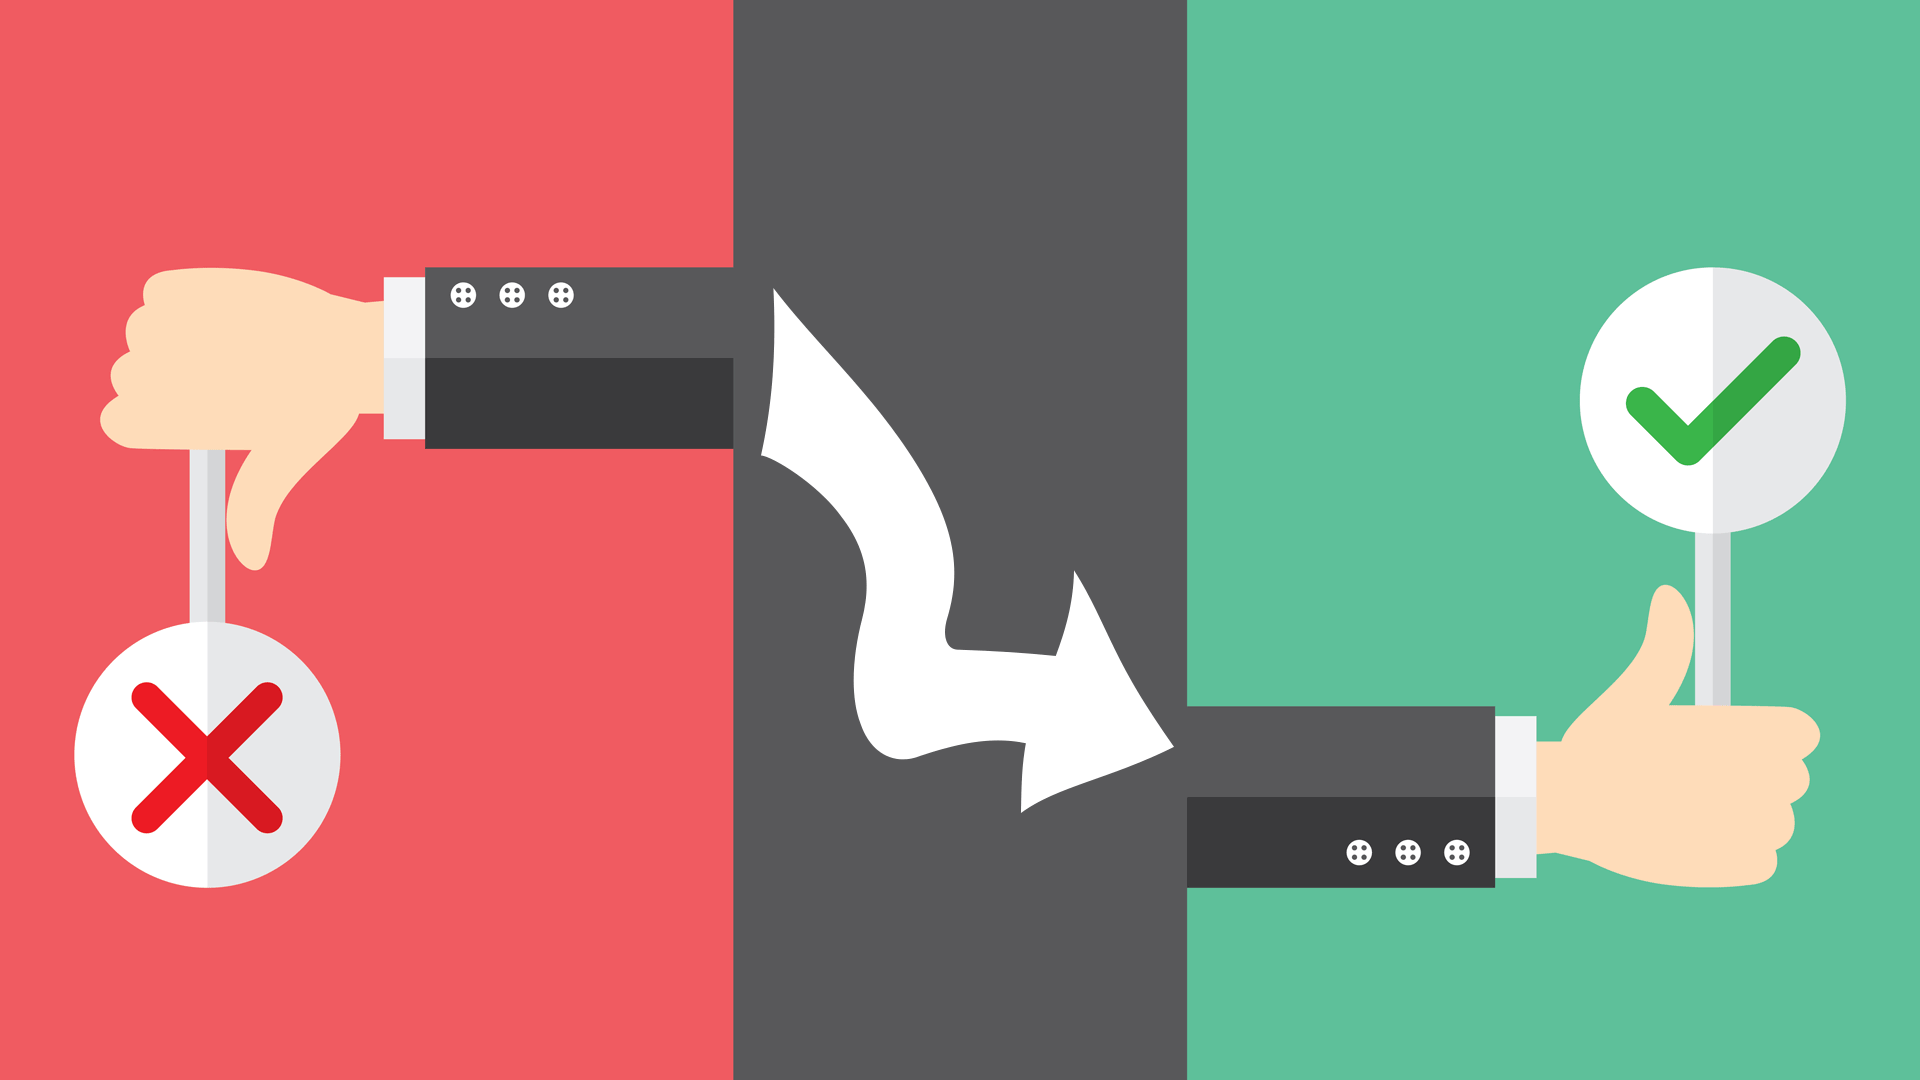

# Description of work

Overview:

> The goal of this project is to, build a robust machine learning user reviews classification model.


Problem statement:

> User reviews are important for restaurants owners, hence classfying a positive or negative review is an essential task for restaurant owners. Classifing i.e. twitter post by human is time consuming, hence creating an automated ML model to classify positive or negative posts for restaurant enhancement is important.



Scope of work:

> The goal of this project is to, build a robust user reviews classifcation model.



Datasets: 

>The first dataset contains food reviews which are scrapped from google maps: https://maps.google.com/maps

>The second dataset contains amazon food reviews reviews collected from Kaggle: https://www.kaggle.com/snap/amazon-fine-food-reviews 

# Imports

Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip install --upgrade --force-reinstall `cat /content/gdrive/My\ Drive/colab_installed.txt`

Mounted at /content/gdrive
ERROR: Invalid requirement: '@'


Installing essential libraries

In [2]:
!pip uninstall googletrans
!pip install googletrans==4.0.0-rc1
!pip install fake_useragent
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 55 kB 2.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42 kB 1.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 10.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 53 kB 2.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65 kB 4.1 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=50926e0317142e68bbf603e5d0cd6b1791d206b589209d00da4ab2fee417d89f
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sh

Importing libraries

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
import os
import time
from bs4 import BeautifulSoup
import math
import pandas as pd
from sqlalchemy import create_engine
from termcolor import colored, cprint
import re
from googletrans import Translator
import requests
from fake_useragent import UserAgent
from matplotlib import pyplot as plt
import sqlite3
import seaborn as sns
import string
import numpy as np 
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com.sa',
    ])
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

# Prep for web scraping

In [ ]:
def init():
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    options = Options()
    options.add_argument("--disable-notifications")
    options.add_argument("--lang=en")
    ua = UserAgent()
    a = ua.random
    user_agent = ua.random
    options.add_argument(f'user-agent={user_agent}')
    # chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
    os.environ["webdriver.chrome.driver"] = chromedriver
    driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    return driver

In [ ]:
def get_reviews(url):
    time.sleep(1)
    if ('=en' in url):
        driver.get(url)
    else:    
        driver.get(url+'?hl=en')
    while( driver.execute_script('return document.readyState') != 'complete'):
        pass
    driver.maximize_window()

    xpath = "//body/div[@id='app-container']/div[@id='content-container']/div[@id='pane']/div[1]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[2]/div[1]/div[1]/span[1]/span[1]/span[1]/span[2]/span[1]/button[1]"
    try:
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, xpath)))
    except:
        return -1
    
    response = BeautifulSoup(driver.page_source, 'html.parser')
    NumofReviews = response.find_all('button', jsaction="pane.rating.moreReviews")[0]['aria-label'][:-8]
    NumofReviews = NumofReviews.replace(',','')
    print('This restaurant has: ',NumofReviews ,' reviews')
    driver.find_elements_by_xpath(xpath)[0].click()
    time.sleep(2)
    
    AreWeBlocked = 0
    
    if(NumofReviews == ''):
        NumofReviews = 0
    else:
        NumofReviews = int(NumofReviews)

    
    for number in range(math.ceil(NumofReviews/4+11)):
        AreWestuck = 0
        
        scrollable_div = driver.find_element_by_css_selector('div.section-scrollbox')
        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrollable_div)
        Scroll = (driver.execute_script("return arguments[0].scrollHeight - arguments[0].scrollTop === arguments[0].clientHeight", scrollable_div))
        if(Scroll == False):
            AreWeBlocked = 0
        if(AreWeBlocked > 500):
            break
        while(driver.execute_script("return arguments[0].scrollHeight - arguments[0].scrollTop === arguments[0].clientHeight", scrollable_div)):
            time.sleep(0.10)
            AreWeBlocked = AreWeBlocked + 1
            AreWestuck = AreWestuck + 1
            if(AreWestuck > 10):
                break
            pass
    time.sleep(2)
    links = driver.find_elements_by_xpath("//button[contains(text(),'More')]")
    for l in links:
                l.click()
    time.sleep(2)

    response = BeautifulSoup(driver.page_source, 'html.parser')
    textlist = []
    
    count = 1
    for i in response.find_all('div', class_='ODSEW-ShBeI NIyLF-haAclf gm2-body-2'):
                # if( count % 10 == 0 ):
                #   print('Review number: ',count)
                count = count + 1
                text = i.find('span', class_='ODSEW-ShBeI-text').text
                if text  == '':
                    continue
                text = text.replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
                if('Translated by Google' in text):
                    text = text.split('(Original)')[0].split('(Translated by Google)')[1].strip()
                emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
                text = emoji_pattern.sub(r'', text).replace("  ", " ")
                try:
                    rate = i.find('span', class_='ODSEW-ShBeI-H1e3jb')['aria-label'][1]
                    date = i.find('span', class_='ODSEW-ShBeI-RgZmSc-date').text
                except:
                    continue
                if (rate  == '' and date  == ''):
                    continue
                if(not text.isascii()):
                    try:
                        translator = Translator()
                        text = translator.translate(text, dest='en').text
                    except:
                        text = text + "(TRANSLATE)"
                        textlist.append([text, rate, date])
                        print("Error occurd")
                        continue
                textlist.append([text, rate, date])
    df_new = pd.DataFrame(textlist,columns =['Review', 'Rate', 'Date'])    
    return df_new

## Get restaurants names

In [ ]:
driver = init()

url = "https://www.google.com/maps/search/restaurants/@24.7953375,46.6750893,14z/data=!3m1!4b1!4m2!2m1!6e5"
if ('=en' in url):
    driver.get(url)
else:    
    driver.get(url+'?hl=en')
while( driver.execute_script('return document.readyState') != 'complete'):
    pass
driver.maximize_window()

In [ ]:
restaurants = dict()

In [ ]:
response = BeautifulSoup(driver.page_source, 'html.parser')
links = response.find_all('a', class_='a4gq8e-aVTXAb-haAclf-jRmmHf-hSRGPd')
for i in range(len(links)):
    restaurants[str(links[i]['aria-label'])] = links[i]['href']

WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//button[@aria-label=' Next page ']"))).click()

In [ ]:
len(restaurants.values())

In [ ]:
for i in restaurants.values():
    print(i)

save resturent link

In [ ]:
import pickle

In [ ]:
with open('restaurants.pickle', 'wb') as handle:
    pickle.dump(restaurants, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Web scrapping

In [ ]:
con = sqlite3.connect("/content/gdrive/MyDrive/RES.db")

In [ ]:
res = pd.read_sql_query("SELECT * FROM url", con)

In [ ]:
#Number of restaurants
len(res)

333

In [ ]:
#Create data frame to be scrapped
df = pd.DataFrame({"Review":[], "Rate":[], 'Date':[], 'Restaurant': []})

In [ ]:
#Scrapping method
driver = init()
ResCount = 1

for i in range(len(res)):
                if(ResCount < 283):
                    ResCount = ResCount + 1
                    continue
                    
                # if(ResCount >= 170):
                #     break
                name, url = res.iloc[i,0], res.iloc[i,1]
                print('Restaurant number: ', ResCount, 'out of ', len(res))
                textlist = get_reviews(url)
                if(type(textlist) != pd.core.frame.DataFrame):
                    ResCount = ResCount + 1
                    continue
       
                textlist = textlist.join(pd.DataFrame({'Restaurant': [name]*len(textlist)}),how='outer')
                cprint(str('We got : ' + str(len(textlist)) +' reviews'), 'green')
                textlist = textlist.reset_index(drop='index')
                df = pd.concat([df, textlist])
                ResCount = ResCount + 1
                time.sleep(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: use options instead of chrome_options
  from ipykernel import kernelapp as app


Restaurant number:  283 out of  333
This restaurant has:  3290  reviews
We got : 930 reviews
Restaurant number:  284 out of  333
This restaurant has:  1058  reviews
We got : 620 reviews
Restaurant number:  285 out of  333
This restaurant has:  13  reviews
We got : 6 reviews
Restaurant number:  286 out of  333
This restaurant has:  4  reviews
We got : 3 reviews
Restaurant number:  287 out of  333
This restaurant has:  23  reviews
We got : 6 reviews
Restaurant number:  288 out of  333
This restaurant has:    reviews
We got : 1 reviews
Restaurant number:  289 out of  333
This restaurant has:  875  reviews
We got : 492 reviews
Restaurant number:  290 out of  333
This restaurant has:  209  reviews
We got : 112 reviews
Restaurant number:  291 out of  333
This restaurant has:  27  reviews
We got : 11 reviews
Restaurant number:  292 out of  333
This restaurant has:  935  reviews
We got : 413 reviews
Restaurant number:  293 out of  333
This restaurant has:  59  reviews
We got : 44 reviews
Resta

In [ ]:
df = df.reset_index(drop='index')
df

Review  ...               Restaurant
0       One of the best and my favorite buffet in Riya...  ...                  The 365
1       The best Sushi in Riyadh!! Gorgeous hotel with...  ...                  The 365
2       Athentic Foods is here only at Hotel Fairmont ...  ...                  The 365
3                  Great food one of the top 10 in riyadh  ...                  The 365
4       The place is amazing, and all the staff are fr...  ...                  The 365
...                                                   ...  ...                      ...
110063                                          Wonderful  ...  ŸÖÿ∑ÿßÿπŸÖ Ÿáÿßÿ¥ŸÖ - Wadi Laban
110064                                               good  ...  ŸÖÿ∑ÿßÿπŸÖ Ÿáÿßÿ¥ŸÖ - Wadi Laban
110065                                     clean and tidy  ...  ŸÖÿ∑ÿßÿπŸÖ Ÿáÿßÿ¥ŸÖ - Wadi Laban
110066                                                Aaa  ...  ŸÖÿ∑ÿßÿπŸÖ Ÿáÿßÿ¥ŸÖ - Wadi Laban
110067                                                     ...  ŸÖÿ∑ÿßÿπŸÖ Ÿáÿßÿ¥ŸÖ - Wadi Laban

[110068 rows x 4 columns]

## saving to pickle

In [ ]:
!ls

GoogleReviews.db     __pycache__          monitor.py
GoogleReviews1.db    data                 py-googletrans
LICENSE              gm-scraper.log       requirements.txt
Project.ipynb        googlemaps.py        restaurants.pickle
README.md            googlemaps.py.save   scraper.py
Untitled.ipynb       googlemaps.py.save.1 urls.txt
Untitled1.ipynb      googlemaps.py.save.2


In [ ]:
import pickle

with open('/content/gdrive/MyDrive/new_df.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

# EDA

## 1. Importing the dataset from pikkle

In [4]:
df = pd.read_pickle("/content/gdrive/MyDrive/new_df2.pickle")

In [5]:
# #!pip install deep-translator
# from deep_translator import GoogleTranslator, PonsTranslator, LingueeTranslator

In [6]:
# # translator = Translator()
# df = df.Review.apply(lambda text: GoogleTranslator(source='auto', target='en').translate(text=text) if not text.isascii() else text)

In [7]:
df.head()

Review  ... Restaurant
0  One of the best and my favorite buffet in Riya...  ...    The 365
1  The best Sushi in Riyadh!! Gorgeous hotel with...  ...    The 365
2  Athentic Foods is here only at Hotel Fairmont ...  ...    The 365
3             Great food one of the top 10 in riyadh  ...    The 365
4  The place is amazing, and all the staff are fr...  ...    The 365

[5 rows x 4 columns]

In [8]:
#What are the top restaurant
df[df.Rate=='5'].groupby('Restaurant')['Rate'].count().sort_values(ascending=False).head(15)

Restaurant
Welcome Indian Restaurant                              1378
TERRACE N09                                             811
Harat Restaurant                                        777
Mizo Eatery                                             761
Zafran                                                  753
Zafran Indian Bistro                                    750
Awani                                                   747
Zaatar W Zeit - Tahliah                                 721
Annabella Ristorante Italiano ŸÖÿ∑ÿπŸÖ ÿ£ŸÜÿßÿ®ŸäŸÑÿß ÿßŸÑÿ•Ÿäÿ∑ÿßŸÑŸä     710
Panda Express                                           698
FARZI CAFE                                              666
The Butcher Shop & Grill                                612
Nakheel Mall                                            607
offwhite lounge Al-Nafl - ÿ£ŸàŸÅ ŸàÿßŸäÿ™ ÿßŸÑŸÜŸÅŸÑ                596
Wildfire Brazilian Steakhouse - ŸàÿßŸäŸÑÿØ ŸÅÿßŸäÿ±              595
Name: Rate, dtype: int64

## 1. Basic information about dataset and clean the data

Here we  look at basic information about the dataset

In [9]:
# Dataframe dimensions
df.shape

(110068, 4)

In [10]:
# Display first 10 rows
df.head(10)

Review  ... Restaurant
0  One of the best and my favorite buffet in Riya...  ...    The 365
1  The best Sushi in Riyadh!! Gorgeous hotel with...  ...    The 365
2  Athentic Foods is here only at Hotel Fairmont ...  ...    The 365
3             Great food one of the top 10 in riyadh  ...    The 365
4  The place is amazing, and all the staff are fr...  ...    The 365
5  Very unique, fresh delicious food, suitable fo...  ...    The 365
6  One of the best restaurants ,especially in Riy...  ...    The 365
7    Great place for lunch. The service is brilliant  ...    The 365
8  Excellent food, great choice across good stations  ...    The 365
9  I liked this restaurant, the service, the qual...  ...    The 365

[10 rows x 4 columns]

In [11]:
# Column datatypes
df.dtypes

Review        object
Rate          object
Date          object
Restaurant    object
dtype: object

In [12]:
#Change rate type to int
df.Rate = df.Rate.astype(int)
df.dtypes

Review        object
Rate           int64
Date          object
Restaurant    object
dtype: object

In [13]:
df.describe()

Rate
count  110068.000000
mean        4.061135
std         1.274551
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000

## Checking and cleaning the data

## Summary of data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


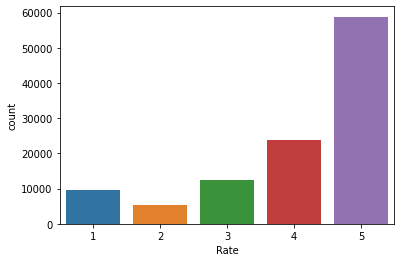

In [14]:
#Show distribution of scores
sns.countplot(df['Rate'])
plt.show()

In [15]:
# Display unique values of 'Restaurant'
nh = df['Restaurant'].unique()
nh

array(['The 365', 'ULounge Restaurant -ŸÖÿ∑ÿπŸÖ ŸäŸàŸÑÿßŸàŸÜÿ¨',
       'delice & lounge restaurant', 'Harat Restaurant', 'Benihana',
       'City Fresh Kitchen', 'TERRACE N09', 'Acme restaurant', "Hardee's",
       'offwhite lounge Al-Nafl - ÿ£ŸàŸÅ ŸàÿßŸäÿ™ ÿßŸÑŸÜŸÅŸÑ', 'Mizo Eatery',
       'Fuddruckers', 'The Spot Restaurant', 'Piatto Restaurant',
       'Margherita', 'Bistro Chino',
       "ÿ≥Ÿäÿ≥ŸäŸÑŸäÿ≤ ÿ®Ÿäÿ™ÿ≤ÿß ŸÉÿ™ÿ≥ - Sicilia's Pizza Cuts",
       'Paul Bakery & Restaurant', 'Johnny Rockets',
       'Zafran Indian Bistro - Levels Mall', 'Lotus', 'Kosebasi',
       'Pakistani Restaurant',
       "ŸÖÿ∑ÿπŸÖ ŸÖŸÑÿπŸÇÿ© ÿßŸÑÿ∑ÿßŸáŸä - Chef's Spoon Restaurant",
       'Golden salamon restaurant', 'Steak House',
       'Annabella Ristorante Italiano ŸÖÿ∑ÿπŸÖ ÿ£ŸÜÿßÿ®ŸäŸÑÿß ÿßŸÑÿ•Ÿäÿ∑ÿßŸÑŸä', 'SHRIMPER',
       'Juice Star Turkish', 'Sham Square Restaurant',
       'Nando‚Äôs Granada Mall', "Nando's Levels Mall", 'Oregano Pizzeria',
       'Lean Meals', 'Fish pan', 'Alfa Co. For Ope

In [16]:
#Number of restaurants?
len(nh)

275

In [17]:
df.head()

Review  ...  Restaurant
0  One of the best and my favorite buffet in Riya...  ...     The 365
1  The best Sushi in Riyadh!! Gorgeous hotel with...  ...     The 365
2  Athentic Foods is here only at Hotel Fairmont ...  ...     The 365
3             Great food one of the top 10 in riyadh  ...     The 365
4  The place is amazing, and all the staff are fr...  ...     The 365

[5 rows x 4 columns]

In [18]:
# Summarize categorical features
df.describe(include=['object'])

Review        Date                 Restaurant
count   110068      110068                     110068
unique   92458          53                        275
top       Good  a year ago  Welcome Indian Restaurant
freq      1481       24104                       2455

In [19]:
#Checking if there is null
df.isnull().sum()

Review        0
Rate          0
Date          0
Restaurant    0
dtype: int64

In [20]:
#Checking if there is duplicate
print(df.duplicated().sum())

5617


In [21]:
#Show me the duplicate
df[df.duplicated(keep=False)].head(20)

Review  ...                        Restaurant
378                                      delicious food  ...  ULounge Restaurant -ŸÖÿ∑ÿπŸÖ ŸäŸàŸÑÿßŸàŸÜÿ¨
379                                      delicious food  ...  ULounge Restaurant -ŸÖÿ∑ÿπŸÖ ŸäŸàŸÑÿßŸàŸÜÿ¨
449                                                      ...        delice & lounge restaurant
641                                                      ...        delice & lounge restaurant
1374  Food, staff and hospitality are outstanding th...  ...                  Harat Restaurant
1376  All the food we ordered today was very good! S...  ...                  Harat Restaurant
1385  All the food we ordered today was very good! S...  ...                  Harat Restaurant
1397  All the food we ordered today was very good! S...  ...                  Harat Restaurant
1460  Food, staff and hospitality are outstanding th...  ...                  Harat Restaurant
1507  It‚Äôs one of the best. The service are really t...  ...                  Harat Restaurant
1511  It‚Äôs one of the best. The service are really t...  ...                  Harat Restaurant
1533   Wonderful good food nice price and helpful staff  ...                  Harat Restaurant
1552   Wonderful good food nice price and helpful staff  ...                  Harat Restaurant
1576  The atmosphere was great . The food was delici...  ...                  Harat Restaurant
1592  Love the atmosphere and the service. Great foo...  ...                  Harat Restaurant
1618  Love the atmosphere and the service. Great foo...  ...                  Harat Restaurant
1633  The atmosphere was great . The food was delici...  ...                  Harat Restaurant
2229                                          Excellent  ...                          Benihana
2237                                            Amazing  ...                          Benihana
2244                                          Excellent  ...                          Benihana

[20 rows x 4 columns]

In [22]:
 #drop duplicates
 df.drop_duplicates(inplace=True)

In [23]:
#Deconcatenation (i.e won't ==> will not)
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
df.Review = df.Review.apply(decontracted)

#Removing numbers
def rem_num(phrase):
  return re.sub("\S*\d\S*", "", phrase).strip().replace('  ', ' ')
df.Review = df.Review.apply(rem_num)

#Removing spacial character
def rem_char(phrase):
  return re.sub('[^A-Za-z]+', ' ', phrase).strip().replace('  ', ' ')
df.Review = df.Review.apply(rem_char)

#Removing html tags
def rem_html(phrase):
  return re.sub('[^A-Za-z]+', ' ', phrase)
df.Review = df.Review.apply(rem_html)

df.head()

Review  ...  Restaurant
0  One of the best and my favorite buffet in Riya...  ...     The 365
1  The best Sushi in Riyadh Gorgeous hotel with a...  ...     The 365
2  Athentic Foods is here only at Hotel Fairmont ...  ...     The 365
3                Great food one of the top in riyadh  ...     The 365
4  The place is amazing and all the staff are fri...  ...     The 365

[5 rows x 4 columns]

In [24]:
#removing stop words
stopwords= set([
    'br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
    "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they',
    'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
    'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
    ])
def rem_stopwords(phrase):
  return ' '.join(e.lower() for e in phrase.split() if e.lower() not in stopwords)
df.Review = df.Review.apply(rem_stopwords)

In [25]:
df.head()

Review  ...  Restaurant
0  one best favorite buffet riyadh missing much s...  ...     The 365
1  best sushi riyadh gorgeous hotel amazing resta...  ...     The 365
2  athentic foods hotel fairmont riyadh come expe...  ...     The 365
3                          great food one top riyadh  ...     The 365
4  place amazing staff friendly big thanks amazin...  ...     The 365

[5 rows x 4 columns]

## Preparing for sentiment anaylsis

In [26]:
# Only these two columns are needed for classifcation
df_new = df.loc[:, ['Review', 'Rate','Restaurant']]

In [27]:
# Add score col.
def get_score(value):
    if int(value) > 3:
        return 1
    else:
        return 0
df_new['Score'] = df_new['Rate'].apply(get_score)

In [28]:
#Drop rate col.
df_new.drop(columns="Rate", inplace=True)

In [29]:
#Exclude empty reviews
df_new = df_new[df_new.Review != '']

In [30]:
#Describe the score
df_new.describe()

Score
count  103783.000000
mean        0.748832
std         0.433687
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000

In [31]:
df_new.head()

Review Restaurant  Score
0  one best favorite buffet riyadh missing much s...    The 365      1
1  best sushi riyadh gorgeous hotel amazing resta...    The 365      1
2  athentic foods hotel fairmont riyadh come expe...    The 365      1
3                          great food one top riyadh    The 365      1
4  place amazing staff friendly big thanks amazin...    The 365      1

In [32]:
df_new = pd.read_pickle("/content/gdrive/MyDrive/new_df3.pickle")

## Vizualizing the data

1    80343
0    27136
Name: Score, dtype: int64


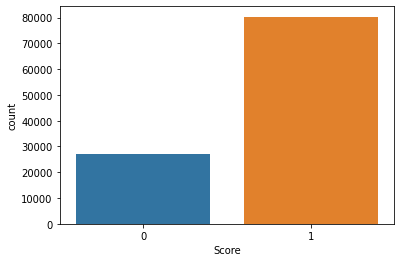

In [33]:
print(df_new['Score'].value_counts())
sns.countplot(x='Score', data=df_new)
plt.show()

## Dealing with class imbalance (undersampling)

In [34]:
#Shuffle the data
df_new = df_new.sample(frac=1).reset_index(drop=True)
df_new.head()

Review  ... Score
0  The food taste same as like our Tamil Nadu tas...  ...     1
1     Amazing healthy food that's reasonable priced.  ...     1
2                                              Good   ...     1
3                      very good restaurant and good  ...     1
4  The decor of the restaurant is beautiful and t...  ...     0

[5 rows x 3 columns]

The below cells was tested to balance the two sets.
Results: bad classification accuracy 

In [35]:
# Neg reviews = postive reviews
df_new[df_new['Score'] == 1] = df_new[df_new['Score'] == 1].iloc[:len(df_new[df_new['Score'] == 0]),:]

In [36]:
# drop null rows
df_new.dropna(inplace=True)

0.0    27136
1.0    27136
Name: Score, dtype: int64


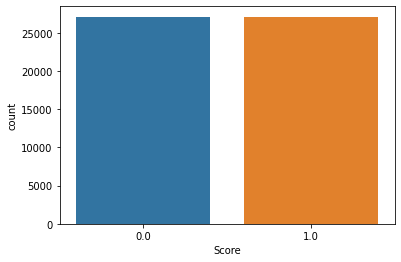

In [37]:
# recheck for imbalance
print(df_new['Score'].value_counts())
sns.countplot(x='Score', data=df_new)
plt.show()

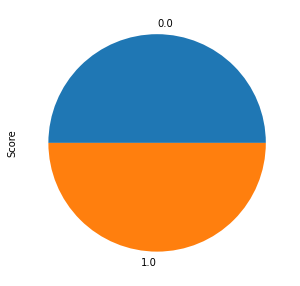

In [38]:
#Pie chart
df_new['Score'].value_counts().plot.pie(figsize=(5, 5))
plt.show()

# Feature Engineering and data visualization

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54272 entries, 0 to 107477
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      54272 non-null  object 
 1   Restaurant  54272 non-null  object 
 2   Score       54272 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.2+ MB


## Spliting before to prevent any data leakage

In [40]:
import random
res_list = list(df_new.Restaurant.unique())
random.shuffle(res_list)
del res_list[0:54]

In [41]:
#Split
X_train = df_new[df_new.Restaurant.isin(res_list)].Review
X_test = df_new[~df_new.Restaurant.isin(res_list)].Review

y_train = df_new[df_new.Restaurant.isin(res_list)].Score
y_test = df_new[~df_new.Restaurant.isin(res_list)].Score

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) # 0.25 x 0.8 = 0.2

In [43]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34901,)
(10645,)
(8726,)


In [44]:
X_train.head()

80361             Beautiful eating high prices sweet place
28878                Good but the service is not that good
44459    The level of service is outstanding and they o...
31631    God bless God is a place very calm and very de...
39423    The food is great and tasty, however, the staf...
Name: Review, dtype: object

In [45]:
X_train = pd.DataFrame(X_train.reset_index().drop(columns='index'))
X_test = pd.DataFrame(X_test.reset_index().drop(columns='index'))
X_val = pd.DataFrame(X_val.reset_index().drop(columns='index'))

y_train = pd.DataFrame(y_train.reset_index().drop(columns='index'))
y_test = pd.DataFrame(y_test.reset_index().drop(columns='index'))
y_val = pd.DataFrame(y_val.reset_index().drop(columns='index'))

In [46]:
def feature_engineering(data):
  ## Number of words in the text
  data["num_words"] = data["Review"].apply(lambda x: len((x).split()))

  ## Number of unique words in the text
  data["num_unique_words"] = data["Review"].apply(lambda x: len(set((x).split())))

  ## Number of characters in the text 
  data["num_chars"] = data["Review"].apply(lambda x: len((x)))

  ## Number of stopwords in the text
  data["num_stopwords"] = data["Review"].apply(lambda x: len([w for w in (x).lower().split() if w in STOPWORDS]))

  ## Number of punctuations in the text 
  data["num_punctuations"] = data['Review'].apply(lambda x: len([c for c in (x) if c in string.punctuation]) )

  ## Average length of the words in the text 
  data["mean_word_len"] = data["Review"].apply(lambda x: np.mean([len(w) for w in (x).split()]))
  return data
X_train = feature_engineering(X_train)
# X_test = feature_engineering(X_test)
# X_val = feature_engineering(X_val)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Keeping the useful rows

In [47]:
def use_parm(data,label):
   ind = data[(data.num_words > 5) &(data.num_words <= 100) & (data.num_punctuations <= 15) & (data.mean_word_len <= 7) & (data.num_chars<210)].index
   data = data[data.index.isin(ind)]
   label = label[label.index.isin(ind)]
   return data, label
X_train, y_train = use_parm(X_train, y_train)
# X_test, y_test = use_parm(X_test, y_test)
# X_val, y_val = use_parm(X_val, y_val)

In [48]:
#removing 'Name' in string
def rem_name(data,label):
   ind = (data[(~data.Review.str.contains('Name', regex=False)) & (~data.Review.str.contains('name', regex=False))]).index
   data = data[data.index.isin(ind)]
   label = label[label.index.isin(ind)]
   return data, label
X_train, y_train = rem_name(X_train, y_train)
X_test, y_test = rem_name(X_test, y_test)
X_val, y_val = rem_name(X_val, y_val)

In [49]:
(X_train[X_train.Review.str.contains('name', regex=False)])

Empty DataFrame
Columns: [Review, num_words, num_unique_words, num_chars, num_stopwords, num_punctuations, mean_word_len]
Index: []

In [50]:
X_train.head()

Review  ...  mean_word_len
0           Beautiful eating high prices sweet place  ...       5.833333
1              Good but the service is not that good  ...       3.750000
3  God bless God is a place very calm and very de...  ...       4.360000
4  The food is great and tasty, however, the staf...  ...       4.147059
7  So delecious. Loved the steak. They serve tast...  ...       4.545455

[5 rows x 7 columns]

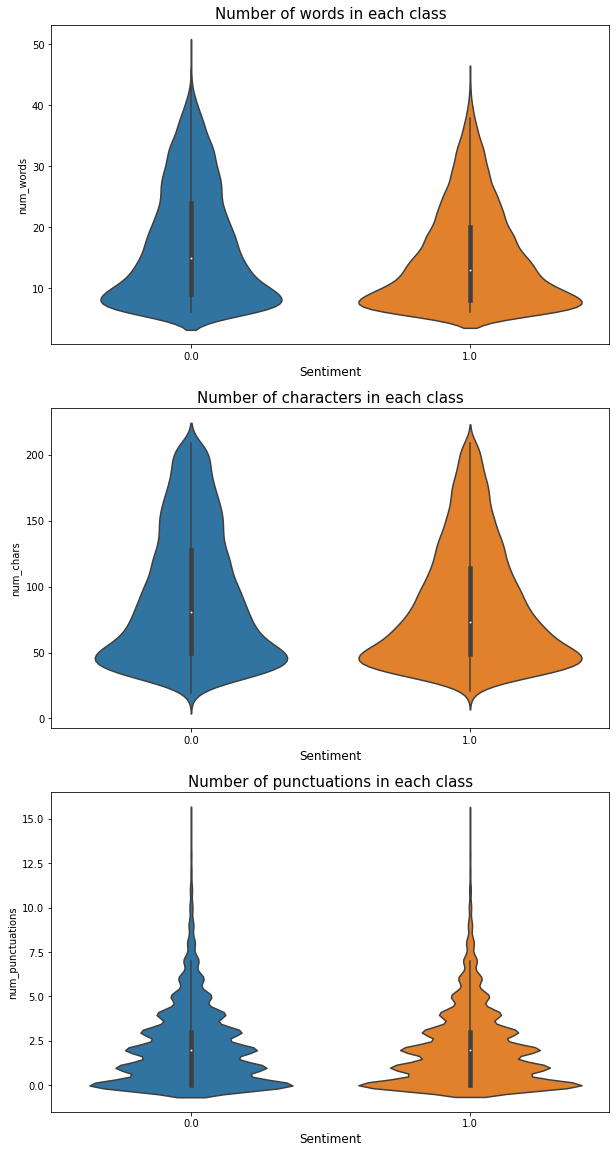

In [51]:
# Violin plot of each feature
f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x=y_train.Score, y='num_words', data=X_train, ax=axes[0])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x=y_train.Score, y='num_chars', data=X_train, ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x=y_train.Score, y='num_punctuations', data=X_train, ax=axes[2])
axes[2].set_xlabel('Sentiment', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


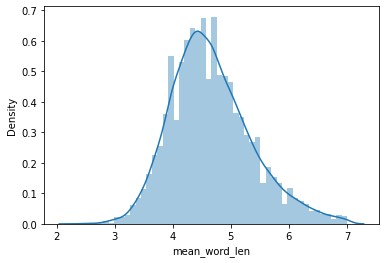

<Figure size 720x1440 with 0 Axes>

In [52]:
#Distrubtion of mean word length
sns.distplot(X_train['mean_word_len'])
plt.figure(figsize=(10,20))
plt.show()

# Amazon food reviews dataset (merging to our dataset)

In [53]:
X_train = X_train.Review
X_test = X_test.Review
X_val = X_val.Review

In [54]:
data = pd.read_csv('/content/gdrive/MyDrive/Reviews.csv') #Read from CSV

In [55]:
#Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
data.rename(columns={"Text":"Review"}, inplace=True)
data.head()

Id  ...                                             Review
0  101975  ...  I started my daughter on these when she was 7 ...
1  322829  ...  real  good to snack on while  doing good  for ...
2  440962  ...  I didn't have the appropriate brewer, so I jus...
3  323564  ...  These are delicious!!  A bit saltier and a lar...
4  522027  ...  This stuff is SO GOOD! My kids hide the jars f...

[5 rows x 10 columns]

In [56]:
#keep only 100k
data = data.iloc[:100000,:]

In [57]:
#lets remove the duplicates
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

# drop null rows
data.dropna(inplace=True)

#Exclude empty reviews
data = data[data.Review != '']

0


In [58]:
# Neg reviews = postive reviews
data.Score = data.Score.apply(get_score)
data[data['Score'] == 1] = data[data['Score'] == 1].iloc[:len(data[data['Score'] == 0]),:]

In [59]:
# drop null rows
data.dropna(inplace=True)

In [60]:
col = ['Review',
       'num_words', 'num_unique_words', 'num_chars', 'num_stopwords',
       'num_punctuations', 'mean_word_len']

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44020 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      44020 non-null  float64
 1   ProductId               44020 non-null  object 
 2   UserId                  44020 non-null  object 
 3   ProfileName             44020 non-null  object 
 4   HelpfulnessNumerator    44020 non-null  float64
 5   HelpfulnessDenominator  44020 non-null  float64
 6   Score                   44020 non-null  float64
 7   Time                    44020 non-null  float64
 8   Summary                 44020 non-null  object 
 9   Review                  44020 non-null  object 
dtypes: float64(5), object(5)
memory usage: 3.7+ MB


In [62]:
def use_parm_2(data,label):
   ind = data[(data.num_words <= 100) & (data.num_punctuations <= 15) & (data.mean_word_len <= 7) & (data.num_chars<210)].index
   data = data[data.index.isin(ind)]
   label = label[label.index.isin(ind)]
   return data, label

In [63]:
# data = feature_engineering(data)
label_ho = data.Score
# data_ho = data.loc[:,col]
# data_ho, label_ho = use_parm_2(data_ho, label_ho)
# data_ho, label_ho = rem_name(data_ho, label_ho)
data_ho = data.Review
data_ho = data_ho.apply(decontracted).apply(rem_num).apply(rem_stopwords).apply(rem_html)

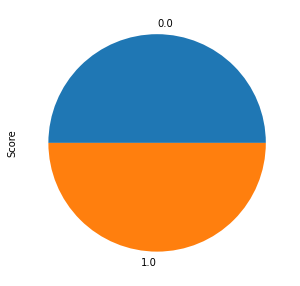

0.0    22010
1.0    22010
Name: Score, dtype: int64

In [64]:
#Pie chart
label_ho.value_counts().plot.pie(figsize=(5, 5))
plt.show()
label_ho.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


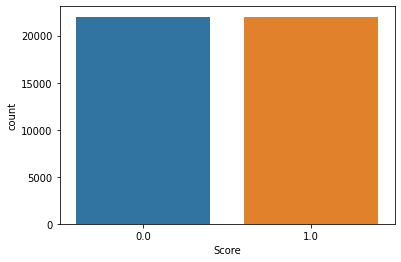

In [65]:
# recheck for imbalance
sns.countplot(label_ho)
plt.show()

In [66]:
data_ho = pd.DataFrame(data_ho.reset_index().drop(columns='index'))
label_ho = pd.DataFrame(label_ho.reset_index().drop(columns='index'))
data_ho = data_ho.Review

In [67]:
idx = X_train.drop_duplicates().index
X_train = X_train[X_train.index.isin(idx)]
y_train = y_train[y_train.index.isin(idx)]

idx = data_ho.drop_duplicates().index
data_ho = data_ho[data_ho.index.isin(idx)]
label_ho = label_ho[label_ho.index.isin(idx)]

In [68]:
X_train = pd.DataFrame(X_train.reset_index().drop(columns='index'))
X_test = pd.DataFrame(X_test.reset_index().drop(columns='index'))
X_val = pd.DataFrame(X_val.reset_index().drop(columns='index'))
data_ho = pd.DataFrame(data_ho.reset_index().drop(columns='index'))


y_train = pd.DataFrame(y_train.reset_index().drop(columns='index'))
y_test = pd.DataFrame(y_test.reset_index().drop(columns='index'))
y_val = pd.DataFrame(y_val.reset_index().drop(columns='index'))
label_ho = pd.DataFrame(label_ho.reset_index().drop(columns='index'))

In [69]:
X_train = X_train.Review
X_test = X_test.Review
X_val = X_val.Review
data_ho = data_ho.Review

y_train = y_train.Score
y_test = y_test.Score
y_val = y_val.Score
label_ho = label_ho.Score

In [70]:
y_train.value_counts()

0.0    10403
1.0     9859
Name: Score, dtype: int64

In [71]:
def merge(trainX, trainY, dataX, data_y):
  trainX = np.concatenate([trainX, dataX])
  trainY = np.concatenate([trainY, data_y])
  return trainX, trainY

In [72]:
X_train, y_train = merge(X_train, y_train, data_ho, label_ho)

# Word cloud

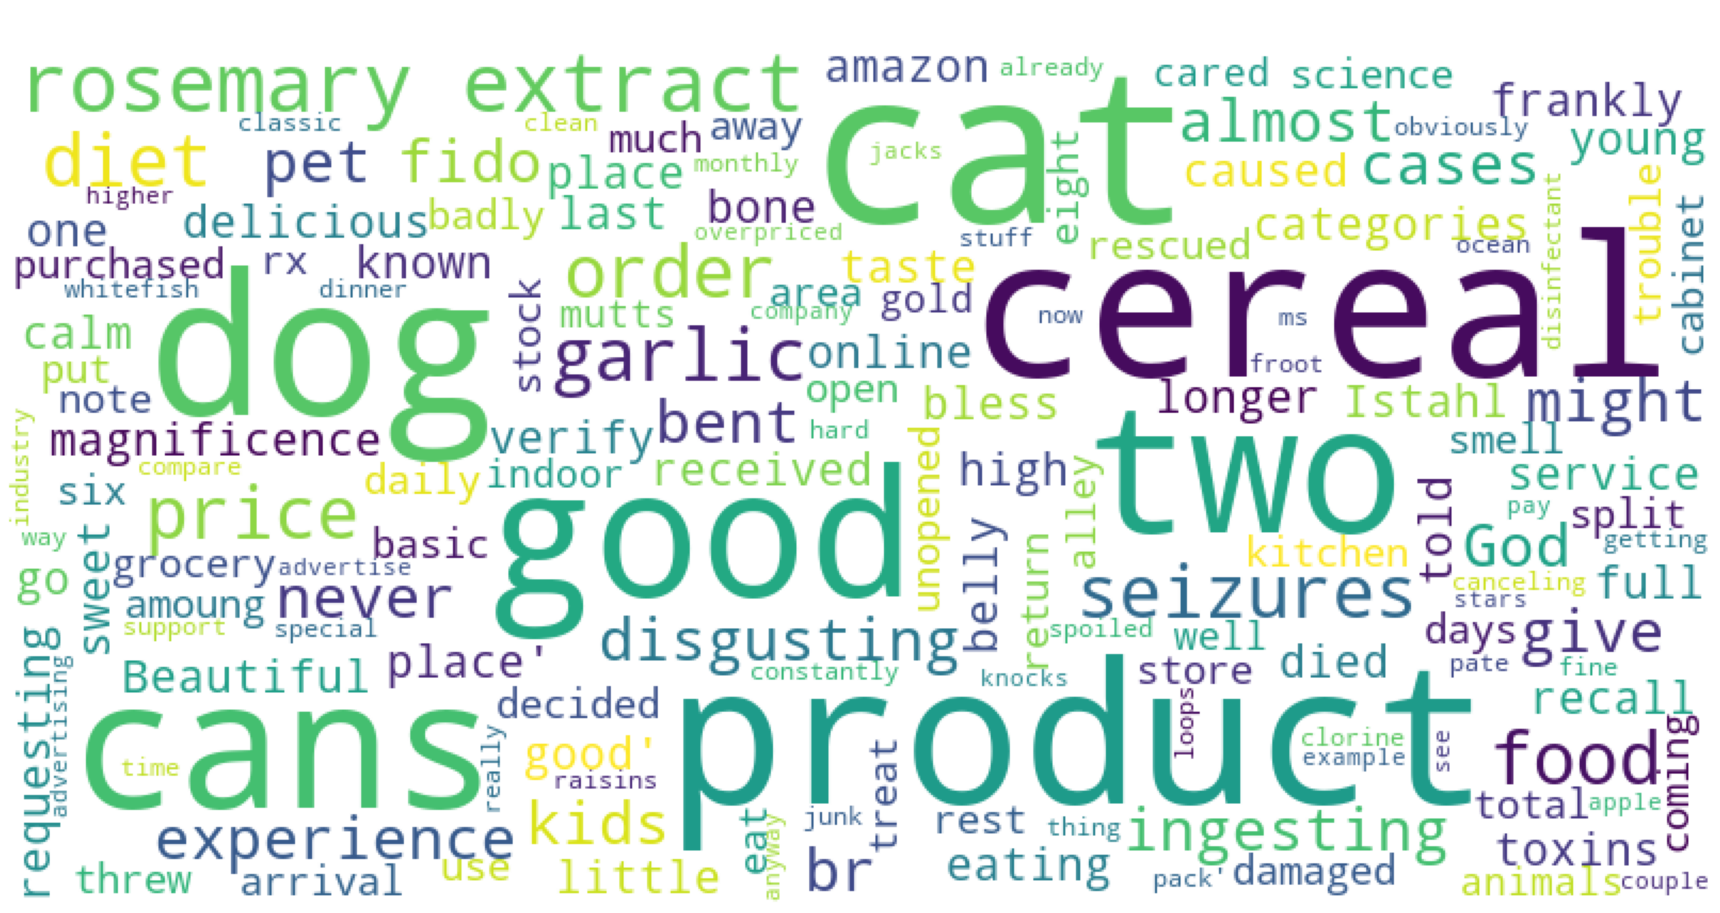

In [73]:
#word cloud for most frequent words
from wordcloud import WordCloud, ImageColorGenerator

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False, pn='p'):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'white', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    plt.savefig('/content/gdrive/MyDrive/Food/static/plot{}.png'.format(pn))
    plt.show()
    
plot_wordcloud(pd.DataFrame(X_train).values, title="Word Cloud of Google maps Reviews", pn='n')

# Model Building

Imports:

In [102]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,f1_score,accuracy_score,ConfusionMatrixDisplay,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Covert text to vectors (BoW)

In [75]:
#Convert text to Bag of words for each word.
bow = CountVectorizer()
bow_counts = bow.fit_transform(X_train)
bow_counts.shape

(60570, 42461)

In [556]:
#don't forgot to normalize train data
X_bow = normalize(bow_counts,axis=0)
#convert cv text to Bow vectors
X_val_bow = bow.transform(X_val.values)
#don't forgot to normalize cv data
X_val_bow = normalize(X_val_bow,axis=0)
#convert test text to Bow vectors
X_test_bow = bow.transform(X_test.values)
#don't forgot to normalize cv data
X_test_bow = normalize(X_test_bow,axis=0)

## Convert text to vectors (TD-IDF)

In [557]:
#Convert text to tfidf for each word in the corpus.
#We consider only uni-grams as computing time and space is less.
tfidf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tfidf = tfidf_vect.fit_transform(X_train)

In [558]:
#print top 10 tfidf words.
#High tfidf value implies word is more important compared to less tfidf value word.
features = tfidf_vect.get_feature_names()
len(features)

# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=10):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tfidf[1,:].toarray()[0],features,10)
top_tfidf

feature     tfidf
0         drank  0.280417
1          cups  0.269645
2          byte  0.261671
3      tiramisu  0.248207
4  conditioning  0.223739
5      external  0.222526
6     requested  0.221743
7        honest  0.211061
8       privacy  0.202508
9       hygiene  0.202508

In [559]:
#don't forgot to normalize train data
X_tfidf = normalize(final_tfidf,axis=0)
#convert cv text to tfidf vectors
X_val_tfidf = tfidf_vect.transform(X_val.values)
#don't forgot to normalize cv data
X_val_tfidf = normalize(X_val_tfidf,axis=0)
#convert test text to tfidf vectors
X_test_tfidf = tfidf_vect.transform(X_test.values)
#don't forgot to normalize cv data
X_test_tfidf = normalize(X_test_tfidf,axis=0)

In [103]:
#function to give various scores on test data for a given model.
def cal_metrics(predicted,actual):
  conf = confusion_matrix(predicted,actual)
  TN,FN,FP,TP = conf[0][0],conf[0][1],conf[1][0],conf[1][1]
  P = TP+FN
  N = TN+FP
  TPR = TP/P
  FPR = FP/P
  FNR = FN/N
  TNR = TN/N
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score =  2 * (precision * recall) / (precision + recall)
  acc = accuracy_score(predicted,actual)
  report=classification_report(predicted,actual)
  print(report)
  print('Various metrics of model:')
 
  print('Precision is:',precision*100)
  print('Recall is:',recall*100)
  
  print('F1 score is:',f1_score*100)
  print('Accuracy is:',acc*100,'\n')
  cf_matrix = confusion_matrix(predicted,actual, normalize='pred')
  # Generate confusion matrix plot
  display_labels = ['Negative', 'Postive']
  disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=display_labels)
  disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
  plt.grid(False)
  disp.ax_.set_xticklabels(display_labels, rotation=12)
  plt.title('Confusion Matrix of Google Maps Reviews')

  plt.show()

In [104]:
#function to print top 10 positive and negative features
def imp_features(vectorizer,clf):
  feature_names = vectorizer.get_feature_names()
  n = clf.coef_[0].shape[0]
  coefs_with_features = sorted(zip(clf.coef_[0], feature_names))
  positive = coefs_with_features[:n-11:-1]
  negative = coefs_with_features[:10]
  positive = [i[1] for i in positive]
  negative = [i[1] for i in negative]

  top = {'positive':positive,'negative':negative}
  print('Top positive and negative features/words')
  top = pd.DataFrame(data=top)
  return top

## Logistic regression (TD-IDF)

For C = 0.000010, val score is : 0.772809
For C = 0.000100, val score is : 0.779417
For C = 0.001000, val score is : 0.779400
For C = 0.010000, val score is : 0.779397
For C = 0.100000, val score is : 0.781863
For C = 1.000000, val score is : 0.789464
For C = 10.000000, val score is : 0.773360


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For C = 100.000000, val score is : 0.742300


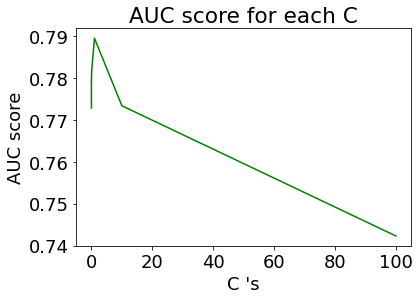


The optimal C is 1.000000.


In [570]:
val_auc = []
Cs = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for i in Cs:
    clf = LogisticRegression(C=i,class_weight='balanced')
    clf.fit(X_tfidf,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_tfidf)
    score = roc_auc_score(y_val, y_pred_val)
    print('For C = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each C")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best C
MSE = [x for x in val_auc]
# determining best C
optimal_c = Cs[MSE.index(max(MSE))]
print('\nThe optimal C is %f.' % optimal_c)

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      5702
         1.0       0.80      0.80      0.80      5850

    accuracy                           0.80     11552
   macro avg       0.80      0.80      0.80     11552
weighted avg       0.80      0.80      0.80     11552

Various metrics of model:
Precision is: 80.2905982905983
Recall is: 79.54276037256562
F1 score is: 79.91492981709912
Accuracy is: 79.56198060941828 



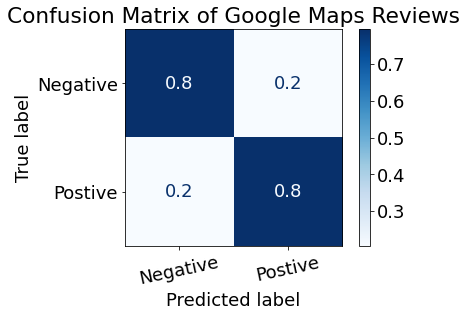

In [571]:
#train model with C.
clf = LogisticRegression(C=optimal_c,class_weight='balanced')
clf.fit(X_tfidf,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_tfidf)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [572]:
y_pred_train = clf.predict(X_tfidf)
y_pred_test = clf.predict(X_test_tfidf)
y_pred_val = clf.predict(X_val_tfidf)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.8413358439248915

Val accuracy score was: 0.7894114866461829

Testing accuracy score was: 0.7956198060941828


In [573]:
#Lets get some of the important features/words for both positive and negative classes
imp_features(tfidf_vect,clf)

Top positive and negative features/words


positive negative
0  delicious      not
1       best      bad
2      great      but
3  excellent       is
4    amazing      the
5     riyadh  average
6       nice   normal
7       love    worst
8  wonderful     than
9  beautiful      too

ROC AUC score =  0.795624196762775


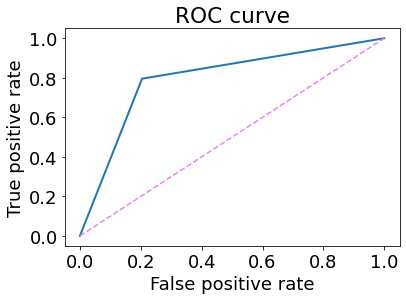

In [574]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## Logistic regression (BoW)

For C = 0.000010, val score is : 0.765087
For C = 0.000100, val score is : 0.744429
For C = 0.001000, val score is : 0.742616
For C = 0.010000, val score is : 0.745921
For C = 0.100000, val score is : 0.765904
For C = 1.000000, val score is : 0.802581


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For C = 10.000000, val score is : 0.786686


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For C = 100.000000, val score is : 0.762752


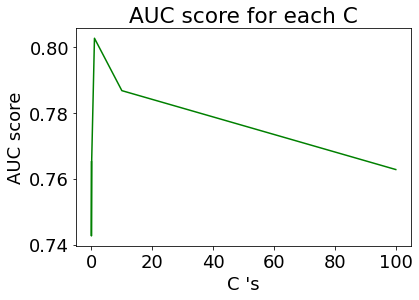


The optimal C is 1.000000.


In [575]:
val_auc = []
Cs = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for i in Cs:
    clf = LogisticRegression(C=i,class_weight='balanced')
    clf.fit(X_bow,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_bow)
    score = roc_auc_score(y_val, y_pred_val)
    print('For C = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each C")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best C
MSE = [x for x in val_auc]
# determining best C
optimal_c = Cs[MSE.index(max(MSE))]
print('\nThe optimal C is %f.' % optimal_c)

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79      5136
         1.0       0.85      0.79      0.82      6416

    accuracy                           0.81     11552
   macro avg       0.81      0.81      0.81     11552
weighted avg       0.81      0.81      0.81     11552

Various metrics of model:
Precision is: 78.61596009975062
Recall is: 85.41913632514819
F1 score is: 81.87647106566025
Accuracy is: 80.67001385041551 



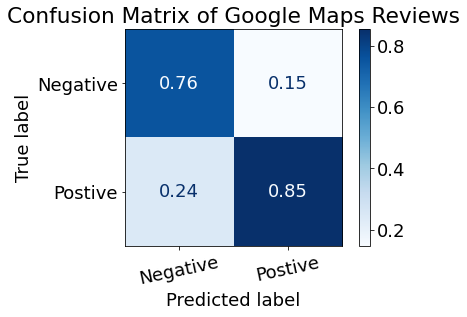

In [576]:
#train model with C.
clf = LogisticRegression(C=optimal_c,class_weight='balanced')
clf.fit(X_bow,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_bow)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [577]:
y_test.value_counts()

1.0    5905
0.0    5647
Name: Score, dtype: int64

In [578]:
y_pred_train = clf.predict(X_bow)
y_pred_test = clf.predict(X_test_bow)
y_pred_val = clf.predict(X_val_bow)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.8302212458810607

Val accuracy score was: 0.8027653037107066

Testing accuracy score was: 0.8067001385041551


In [579]:
#Lets get some of the important features/words for both positive and negative classes
imp_features(bow,clf)

Top positive and negative features/words


positive   negative
0  delicious        bad
1       best        not
2      great        but
3  excellent         is
4    amazing     normal
5       nice    average
6     riyadh        the
7  wonderful  expensive
8       love      worst
9  beautiful        too

ROC AUC score =  0.8056152495379066


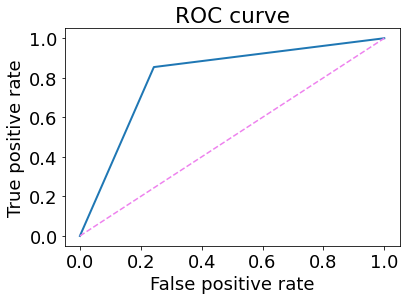

In [580]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## Naive Bayes (TD-IDF)

For Alpha = 0.000001, val score is : 0.711947
For Alpha = 0.000010, val score is : 0.711947
For Alpha = 0.000100, val score is : 0.712066
For Alpha = 0.001000, val score is : 0.712185
For Alpha = 0.010000, val score is : 0.712781
For Alpha = 0.100000, val score is : 0.715980
For Alpha = 1.000000, val score is : 0.736132
For Alpha = 10.000000, val score is : 0.768741
For Alpha = 100.000000, val score is : 0.786088
For Alpha = 1000.000000, val score is : 0.787995


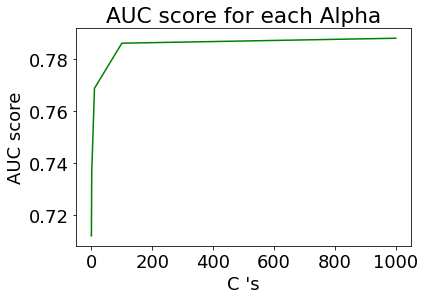


The optimal Alpha is 1000.000000.


In [586]:
val_auc = []
Cs = [10**x for x in range(-6,4)]
for i in Cs:
    clf = MultinomialNB(alpha=i,fit_prior=None)
    clf.fit(X_tfidf,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_tfidf)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78      5169
         1.0       0.84      0.78      0.81      6383

    accuracy                           0.80     11552
   macro avg       0.80      0.80      0.80     11552
weighted avg       0.80      0.80      0.80     11552

Various metrics of model:
Precision is: 78.01973993420022
Recall is: 84.33530906011855
F1 score is: 81.0546875
Accuracy is: 79.84764542936288 



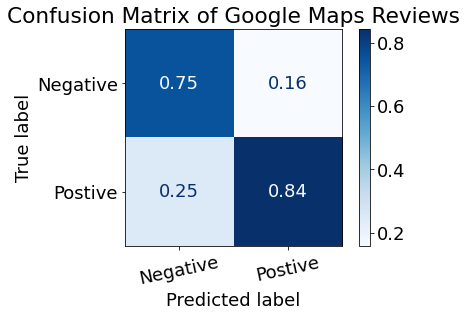

In [587]:
#train model with C.
clf = MultinomialNB(alpha=optimal_alpha,fit_prior=None)
clf.fit(X_tfidf,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_tfidf)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [588]:
y_pred_train = clf.predict(X_tfidf)
y_pred_test = clf.predict(X_test_tfidf)
y_pred_val = clf.predict(X_val_tfidf)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.8252523667555834

Val accuracy score was: 0.7883479082959112

Testing accuracy score was: 0.7984764542936288


In [589]:
#Lets get some of the important features/words for both positive and negative classes
imp_features(tfidf_vect,clf)

Top positive and negative features/words


positive negative
0         and      00d
1        food     00pm
2         the       01
3        good       05
4   delicious       06
5     service       08
6  restaurant       09
7       place      105
8        best      109
9       great    10mts

ROC AUC score =  0.7974512929542141


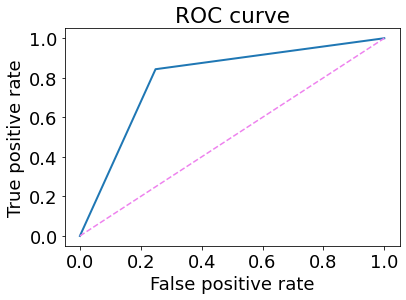

In [590]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## Naive Bayes (BoW)

For Alpha = 0.000001, val score is : 0.721146
For Alpha = 0.000010, val score is : 0.721146
For Alpha = 0.000100, val score is : 0.721146
For Alpha = 0.001000, val score is : 0.721383
For Alpha = 0.010000, val score is : 0.722453
For Alpha = 0.100000, val score is : 0.726137
For Alpha = 1.000000, val score is : 0.749425
For Alpha = 10.000000, val score is : 0.784251
For Alpha = 100.000000, val score is : 0.801385
For Alpha = 1000.000000, val score is : 0.802707


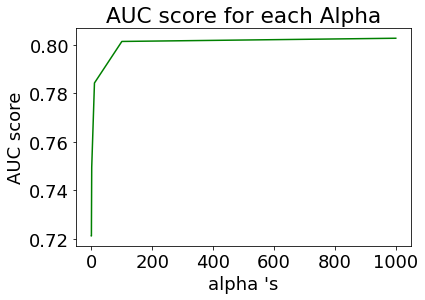


The optimal Alpha is 1000.000000.


In [581]:
val_auc = []
Cs = [10**x for x in range(-6,4)]
for i in Cs:
    clf = MultinomialNB(alpha=i,fit_prior=None)
    clf.fit(X_bow,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_bow)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("alpha 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      5541
         1.0       0.82      0.80      0.81      6011

    accuracy                           0.81     11552
   macro avg       0.80      0.81      0.81     11552
weighted avg       0.81      0.81      0.81     11552

Various metrics of model:
Precision is: 80.40259524205624
Recall is: 81.84589331075361
F1 score is: 81.1178247734139
Accuracy is: 80.52285318559557 



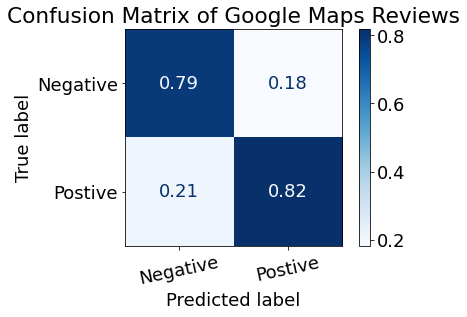

In [582]:
#train model with C.
clf = MultinomialNB(alpha=optimal_alpha,fit_prior=None)
clf.fit(X_bow,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_bow)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [583]:
y_pred_train = clf.predict(X_bow)
y_pred_test = clf.predict(X_test_bow)
y_pred_val = clf.predict(X_val_bow)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.8106857053193158

Val accuracy score was: 0.8027653037107066

Testing accuracy score was: 0.8052285318559557


In [584]:
#Lets get some of the important features/words for both positive and negative classes
imp_features(bow,clf)

Top positive and negative features/words


positive negative
0        food      00d
1        good     00pm
2   delicious       01
3         and       05
4     service       06
5       great       08
6        best       09
7       place      105
8        nice      109
9  restaurant    10mts

ROC AUC score =  0.8049262967290823


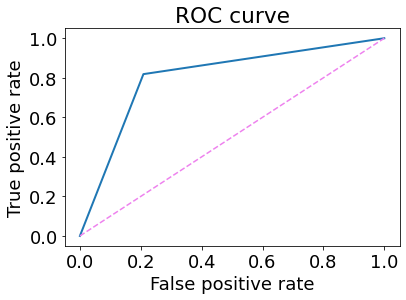

In [585]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## Decision Trees (TD-IDF)

For Alpha = 1.000000, val score is : 0.597448
For Alpha = 5.000000, val score is : 0.661257
For Alpha = 10.000000, val score is : 0.679084
For Alpha = 50.000000, val score is : 0.671742
For Alpha = 100.000000, val score is : 0.654737
For Alpha = 500.000000, val score is : 0.650548
For Alpha = 1000.000000, val score is : 0.652007


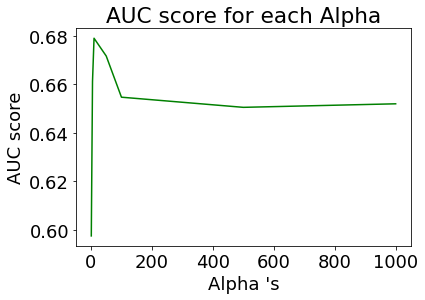


The optimal Alpha is 10.000000.


In [591]:
val_auc = []
Cs = [1, 5, 10, 50, 100, 500, 1000]
for i in Cs:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_tfidf,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_tfidf)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("Alpha 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.54      0.76      0.63      4011
         1.0       0.84      0.66      0.74      7541

    accuracy                           0.69     11552
   macro avg       0.69      0.71      0.68     11552
weighted avg       0.74      0.69      0.70     11552

Various metrics of model:
Precision is: 65.6676833311232
Recall is: 83.86113463166808
F1 score is: 73.6575933363082
Accuracy is: 69.33864265927978 



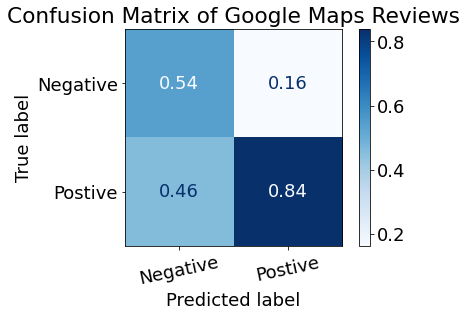

In [592]:
#train model with C.
clf = DecisionTreeClassifier(max_depth=optimal_alpha)
clf.fit(X_tfidf,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_tfidf)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [593]:
y_pred_train = clf.predict(X_tfidf)
y_pred_test = clf.predict(X_test_tfidf)
y_pred_val = clf.predict(X_val_tfidf)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.7327266070401172

Val accuracy score was: 0.6796265658236823

Testing accuracy score was: 0.6933864265927978


ROC AUC score =  0.6900689102753936


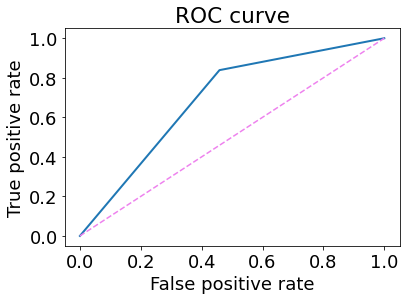

In [594]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## Decision Tree (BoW)

For Alpha = 1.000000, val score is : 0.597448
For Alpha = 5.000000, val score is : 0.644468
For Alpha = 10.000000, val score is : 0.682840
For Alpha = 50.000000, val score is : 0.718992
For Alpha = 100.000000, val score is : 0.707462
For Alpha = 500.000000, val score is : 0.712217
For Alpha = 1000.000000, val score is : 0.710264


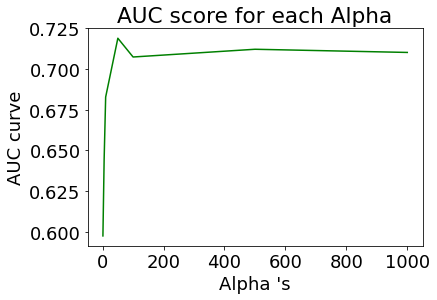


The optimal Alpha is 50.000000.


In [595]:
val_auc = []
Cs = [1, 5, 10, 50, 100, 500, 1000]
for i in Cs:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_bow,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_bow)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("Alpha 's")
plt.ylabel("AUC curve")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      5065
         1.0       0.78      0.71      0.75      6487

    accuracy                           0.73     11552
   macro avg       0.73      0.73      0.73     11552
weighted avg       0.73      0.73      0.73     11552

Various metrics of model:
Precision is: 71.40434715585016
Recall is: 78.4419983065199
F1 score is: 74.75790832795352
Accuracy is: 72.92243767313019 



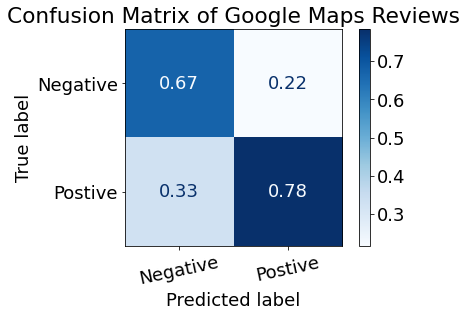

In [596]:
#train model with C.
clf = DecisionTreeClassifier(max_depth=optimal_alpha)
clf.fit(X_bow,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_bow)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [597]:
y_pred_train = clf.predict(X_bow)
y_pred_test = clf.predict(X_test_bow)
y_pred_val = clf.predict(X_val_bow)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.9115539515665045

Val accuracy score was: 0.7218151737177972

Testing accuracy score was: 0.7292243767313019


ROC AUC score =  0.7279634889648643


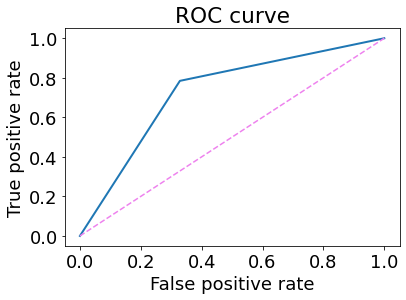

In [598]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## RandomForest (TD-IDF)

For Alpha = 5.000000, val score is : 0.689157
For Alpha = 10.000000, val score is : 0.737247
For Alpha = 50.000000, val score is : 0.774642
For Alpha = 100.000000, val score is : 0.782657
For Alpha = 120.000000, val score is : 0.783946


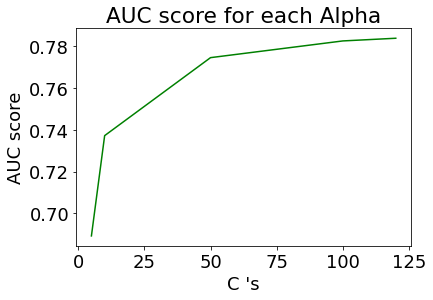


The optimal Alpha is 120.000000.


In [562]:
val_auc = []
Cs = [5, 10, 50, 100, 120]
for i in Cs:
    clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced',n_estimators=i)
    clf.fit(X_tfidf,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_tfidf)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.79      5057
         1.0       0.86      0.78      0.82      6495

    accuracy                           0.80     11552
   macro avg       0.80      0.80      0.80     11552
weighted avg       0.81      0.80      0.80     11552

Various metrics of model:
Precision is: 77.81370284834487
Recall is: 85.58848433530906
F1 score is: 81.51612903225806
Accuracy is: 80.15927977839335 



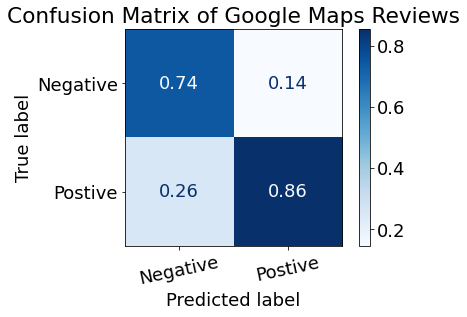

In [563]:
#train model with C.
clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced',n_estimators=optimal_alpha)
clf.fit(X_tfidf,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_tfidf)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [564]:
y_pred_train = clf.predict(X_tfidf)
y_pred_test = clf.predict(X_test_tfidf)
y_pred_val = clf.predict(X_val_tfidf)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.9920759453946336

Val accuracy score was: 0.7859844008508626

Testing accuracy score was: 0.8015927977839336


ROC AUC score =  0.8003525509487251


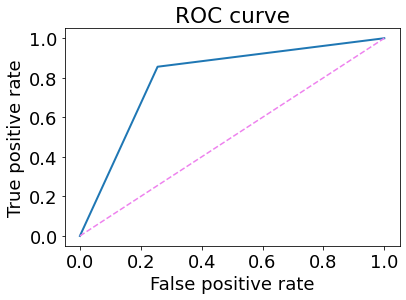

In [565]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## RandomForest (BoW)

For Alpha = 5.000000, val score is : 0.715972
For Alpha = 10.000000, val score is : 0.743097
For Alpha = 50.000000, val score is : 0.780226
For Alpha = 100.000000, val score is : 0.787760
For Alpha = 120.000000, val score is : 0.790099


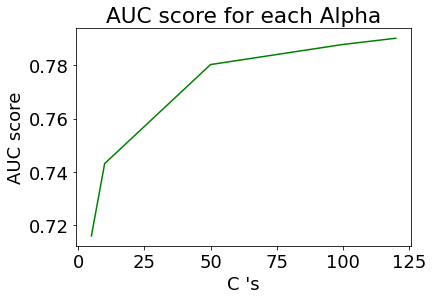


The optimal Alpha is 120.000000.


In [566]:
val_auc = []
Cs = [5, 10, 50, 100, 120]
for i in Cs:
    clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced',n_estimators=i)
    clf.fit(X_bow,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_bow)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      5424
         1.0       0.84      0.81      0.82      6128

    accuracy                           0.82     11552
   macro avg       0.81      0.82      0.82     11552
weighted avg       0.82      0.82      0.82     11552

Various metrics of model:
Precision is: 80.77676240208878
Recall is: 83.8272650296359
F1 score is: 82.27374719521316
Accuracy is: 81.5356648199446 



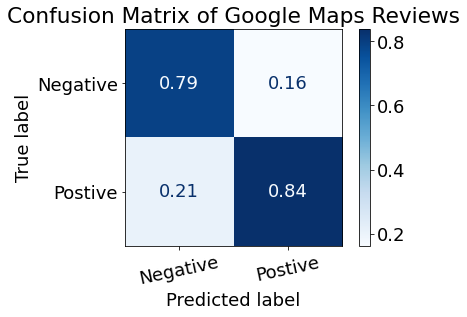

In [567]:
#train model with C.
clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced',n_estimators=optimal_alpha)
clf.fit(X_bow,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_bow)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [568]:
y_pred_train = clf.predict(X_bow)
y_pred_test = clf.predict(X_test_bow)
y_pred_val = clf.predict(X_val_bow)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.9921544013808253

Val accuracy score was: 0.788584259040416

Testing accuracy score was: 0.815356648199446


ROC AUC score =  0.8148331553234938


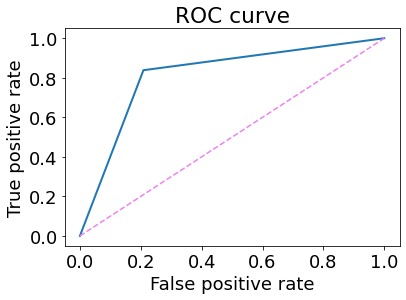

In [569]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## XGBoost (TD-IDF)

In [599]:
from xgboost import XGBClassifier

For Alpha = 5.000000, val score is : 0.634935
For Alpha = 10.000000, val score is : 0.640598
For Alpha = 50.000000, val score is : 0.726830
For Alpha = 100.000000, val score is : 0.758456
For Alpha = 120.000000, val score is : 0.760287
For Alpha = 200.000000, val score is : 0.776836
For Alpha = 400.000000, val score is : 0.788330


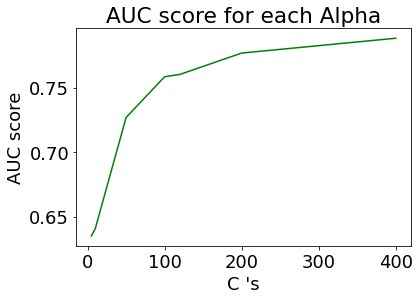


The optimal Alpha is 400.000000.


In [600]:
val_auc = []
Cs = [5, 10, 50, 100, 120,200,400]
for i in Cs:
    clf = XGBClassifier(n_jobs= -1,class_weight='balanced',n_estimators=i)
    clf.fit(X_tfidf,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_tfidf)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77      4759
         1.0       0.87      0.76      0.81      6793

    accuracy                           0.79     11552
   macro avg       0.79      0.80      0.79     11552
weighted avg       0.81      0.79      0.79     11552

Various metrics of model:
Precision is: 75.88694244074783
Recall is: 87.29889923793395
F1 score is: 81.19388880138607
Accuracy is: 79.32825484764543 



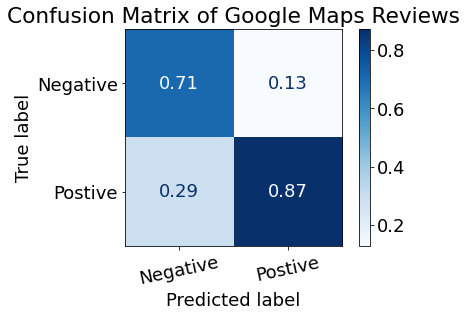

In [601]:
#train model with C.
clf = XGBClassifier(n_jobs= -1,class_weight='balanced',n_estimators=optimal_alpha)
clf.fit(X_tfidf,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_tfidf)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [602]:
y_pred_train = clf.predict(X_tfidf)
y_pred_test = clf.predict(X_test_tfidf)
y_pred_val = clf.predict(X_val_tfidf)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.8016894189026623

Val accuracy score was: 0.7887024344126684

Testing accuracy score was: 0.7932825484764543


ROC AUC score =  0.7914617354317451


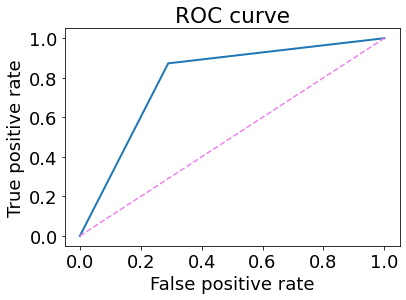

In [603]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## XGBoost (BoW)

For Alpha = 5.000000, val score is : 0.639337
For Alpha = 10.000000, val score is : 0.651966
For Alpha = 50.000000, val score is : 0.721323
For Alpha = 100.000000, val score is : 0.755541
For Alpha = 120.000000, val score is : 0.758271
For Alpha = 200.000000, val score is : 0.772734
For Alpha = 400.000000, val score is : 0.786476


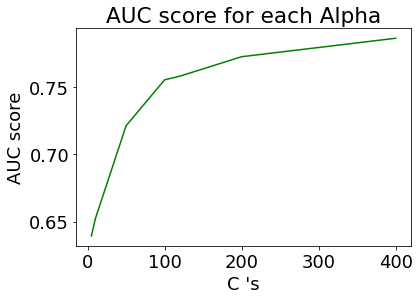


The optimal Alpha is 400.000000.


In [604]:
val_auc = []
Cs = [5, 10, 50, 100, 120,200,400]
for i in Cs:
    clf = XGBClassifier(n_jobs= -1,class_weight='balanced',n_estimators=i)
    clf.fit(X_bow,np.array(y_train).reshape(-1,))
    y_pred_val = clf.predict(X_val_bow)
    score = roc_auc_score(y_val, y_pred_val)
    print('For Alpha = %f, val score is : %f' %(i,score))
    val_auc.append(score)
    
#plot errors and val scores
fig, ax = plt.subplots()
ax.plot(Cs, val_auc,c='g')
plt.grid()
plt.title("AUC score for each Alpha")
plt.xlabel("C 's")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# determining best alpha
MSE = [x for x in val_auc]
# determining best alpha
optimal_alpha = Cs[MSE.index(max(MSE))]
print('\nThe optimal Alpha is %f.' % optimal_alpha)

              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76      4583
         1.0       0.88      0.75      0.81      6969

    accuracy                           0.79     11552
   macro avg       0.79      0.80      0.79     11552
weighted avg       0.81      0.79      0.79     11552

Various metrics of model:
Precision is: 74.83139618309657
Recall is: 88.31498729889924
F1 score is: 81.01600124281497
Accuracy is: 78.84349030470914 



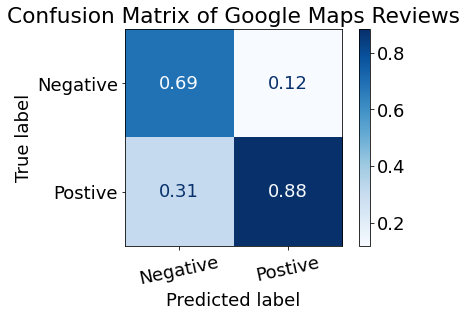

In [605]:
#train model with C.
clf = clf = XGBClassifier(n_jobs= -1,class_weight='balanced',n_estimators=optimal_alpha)
clf.fit(X_bow,y_train)
#predict y labels with model on test data
predict = clf.predict(X_test_bow)
#Performance of the model on the test data
cal_metrics(predict,y_test)

In [606]:
y_pred_train = clf.predict(X_bow)
y_pred_test = clf.predict(X_test_bow)
y_pred_val = clf.predict(X_val_bow)

train_score = accuracy_score(y_train, y_pred_train)
val_score = accuracy_score(y_val, y_pred_val)
test_score = accuracy_score(y_test, y_pred_test)
# report results
print('\nTraining accuracy score was:', train_score)
print('\nVal accuracy score was:', val_score)
print('\nTesting accuracy score was:', test_score)


Training accuracy score was: 0.7924577645274334

Val accuracy score was: 0.7869298038288821

Testing accuracy score was: 0.7884349030470914


ROC AUC score =  0.7862712354142766


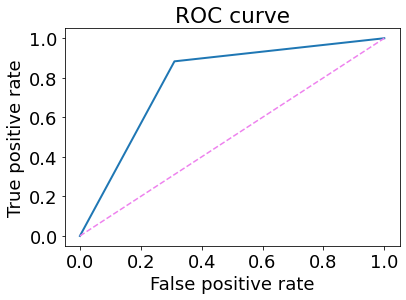

In [607]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_test))

## Long short term memory

In [608]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout

In [609]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 50000)
tokenizer.fit_on_texts(X_train)

In [610]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)
X_val_tok = tokenizer.texts_to_sequences(X_val)

In [611]:
max_review_length = 600
X_train_pad = sequence.pad_sequences(X_train_tok, maxlen=max_review_length)
X_test_pad = sequence.pad_sequences(X_test_tok, maxlen=max_review_length)
X_val_pad = sequence.pad_sequences(X_val_tok, maxlen=max_review_length)

In [612]:
embedding_vector_length = 55
top_words = 5000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 55)           275000    
_________________________________________________________________
lstm (LSTM)                  (None, 600, 256)          319488    
_________________________________________________________________
dropout (Dropout)            (None, 600, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 791,737
Trainable params: 791,737
Non-trainable params: 0
_________________________________________________________________
None


In [613]:
history = model.fit(X_train_pad, y_train, epochs=3, batch_size=64,validation_data=(X_val_pad,y_val))
# Final evaluation of the model on test data
scores = model.evaluate(X_test_pad, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
598/598 [==============================] - 67s 106ms/step - loss: 0.5110 - accuracy: 0.7570 - val_loss: 0.4359 - val_accuracy: 0.8058
Epoch 2/3
598/598 [==============================] - 63s 105ms/step - loss: 0.4379 - accuracy: 0.8051 - val_loss: 0.4241 - val_accuracy: 0.8109
Epoch 3/3
598/598 [==============================] - 63s 105ms/step - loss: 0.4010 - accuracy: 0.8202 - val_loss: 0.4255 - val_accuracy: 0.8048
Accuracy: 80.83%


Learning Curves: 


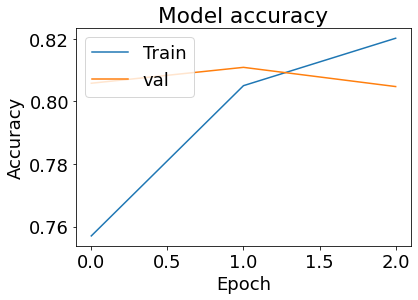

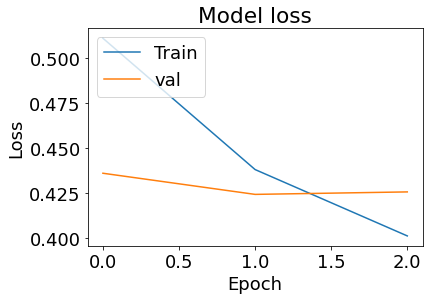

In [614]:
print('Learning Curves: ')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()
plt.close()

In [615]:
train_score = model.evaluate(X_train_pad, y_train, verbose=0)
val_score = model.evaluate(X_val_pad, y_val, verbose=0)
test_score = model.evaluate(X_test_pad, y_test, verbose=0)
# report results
print('\nTraining accuracy score was:', train_score[1])
print('\nVal accuracy score was:', val_score[1])
print('\nTesting accuracy score was:', test_score[1])


Training accuracy score was: 0.8471677303314209

Val accuracy score was: 0.804774284362793

Testing accuracy score was: 0.8082582950592041


ROC AUC score =  0.8959530563837108


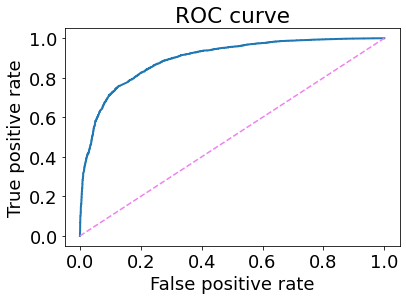

In [616]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict(X_test_pad))
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, model.predict(X_test_pad)))

In [617]:
y_pred_ltsm = model.predict(X_test_pad)
y_pred_ltsm = np.where(y_pred_ltsm<0.5,0,1)

In [618]:
accuracy_score(y_pred_ltsm, y_test)

0.8082583102493075

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      4800
           1       0.88      0.77      0.82      6752

    accuracy                           0.81     11552
   macro avg       0.81      0.82      0.81     11552
weighted avg       0.82      0.81      0.81     11552

Various metrics of model:
Precision is: 77.32523696682463
Recall is: 88.41659610499578
F1 score is: 82.49980248084063
Accuracy is: 80.82583102493075 



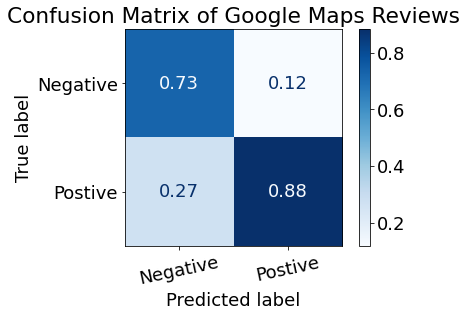

In [619]:
#Performance of the model on the test data
cal_metrics(y_pred_ltsm,y_test)

Cross-val

In [468]:
# from sklearn.model_selection import KFold
# import numpy as np

# kf = KFold(5, True, 1)
# inputs = np.concatenate((X_train_pad, X_val_pad), axis=0)
# targets = np.concatenate((np.array(y_train), np.array(y_val)), axis=0)
# acc = []
# f1 = []
# roc_s = []
# res = dict()
# fold = 1
# X_data_tok = tokenizer.texts_to_sequences(data_ho)
# X_data_pad = sequence.pad_sequences(X_data_tok, maxlen=max_review_length)

# for train_index, test_index in kf.split(X_train):

#   TrainX, Trainy = merge(inputs[train_index],targets[train_index],  X_data_pad, np.array(label_ho))
#   history = model.fit(TrainX, Trainy, epochs=3, batch_size=64,validation_data=(inputs[test_index], targets[test_index]))
#   # Final evaluation of the model on test data
#   scores = model.evaluate(inputs[test_index], targets[test_index], verbose=0)
#   y_pred = model.predict(X_t_pooled_output)
#   y_pred = np.where(y_pred<.50,0,1)
#   F1_S = f1_score(targets[test_index], y_pred)
#   roc = roc_auc_score(targets[test_index], y_pred)
#   res[fold] = [scores[1]*100, F1_S, roc]
#   acc.append(scores[1]*100)
#   f1.append(F1_S)
#   roc_s.append(roc)
#   fold =fold +1

(35188,)
Epoch 1/3
550/550 [==============================] - 59s 104ms/step - loss: 0.6925 - accuracy: 0.5558 - val_loss: 0.6997 - val_accuracy: 0.5111
Epoch 2/3
167/550 [========>.....................] - ETA: 38s - loss: 0.6837 - accuracy: 0.5602

KeyboardInterrupt: ignored

Logistic Regression Model best F1 score 0.825 at prob decision threshold >= 0.499


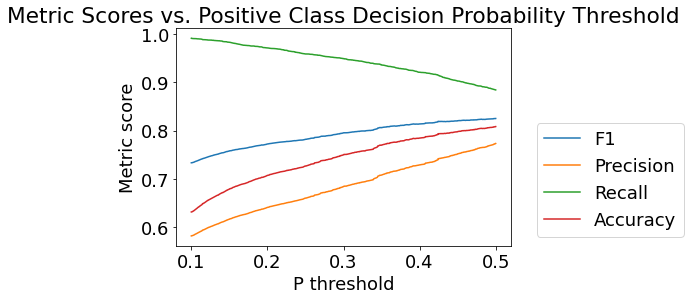

In [620]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = model.predict(X_test_pad) # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_test, model_val_labels))    
    prec_scores.append(precision_score(y_test, model_val_labels))
    rec_scores.append(recall_score(y_test, model_val_labels))
    acc_scores.append(accuracy_score(y_test, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

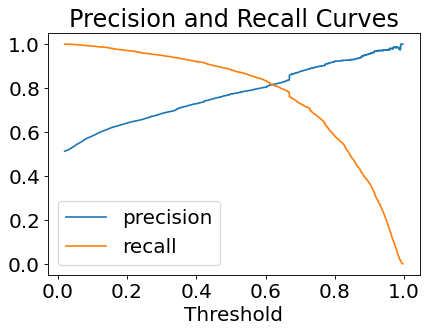

In [621]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


precision_curve, recall_curve, threshold_curve = precision_recall_curve(np.array(y_test), model.predict(X_test_pad) )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

Save model:

In [ ]:
from tensorflow.keras.models import save_model, load_model
import pickle
save_model(model,'/content/gdrive/MyDrive/Food/model_best.model')
with open('/content/gdrive/MyDrive/Food/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Food/model_best.model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Food/model_best.model/assets


## Bert

In [78]:
!pip install bert-tensorflow
!pip install tqdm
!pip install tensorflow_hub

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 64 kB 2.3 MB/s 


In [80]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

max_seq_length = 55
tf.keras.backend.clear_session()
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")
                # ids of words
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
                # masking of ids
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")
                # segment of ids
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)

In [81]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 55)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 55)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 55)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [82]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [83]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
!pip install sentencepiece

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 5.1 MB/s 


In [84]:
import tokenization
def bert_preprocess(sentence,tokenizer,max_seq_len=512):
    tokens=[]
    masks=[]
    segments=[]
    for word in sentence:
        word=tokenizer.tokenize(word)
        word=word[:max_seq_len-2]
        seq=["[CLS]"] + word + ["[SEP]"]
        token = tokenizer.convert_tokens_to_ids(seq)
        padding_tokens=token+[0]*(max_seq_len-len(token))
        mask=[1]*len(seq)
        masking=mask+[0]*(max_seq_len-len(token))
        segment=np.zeros(max_seq_length)
        
        tokens.append(padding_tokens)
        masks.append(masking)
        segments.append(segment)
    return np.array(tokens),np.array(masks),np.array(segments)

In [85]:
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case)

In [98]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [99]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [100]:
#Preprocessing for bert model
X_train_tokens, X_train_mask, X_train_segment=bert_preprocess(X_train,tokenizer,55)
X_test_tokens, X_test_mask, X_test_segment=bert_preprocess(X_test.values,tokenizer,55)
X_val_tokens, X_val_mask, X_val_segment=bert_preprocess(X_val.values,tokenizer,55)

X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])
X_val_pooled_output=bert_model.predict([X_val_tokens, X_val_mask, X_val_segment])

In [86]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [87]:
import datetime
from sklearn.metrics import roc_auc_score
auc=[]
val_auc=[]
BestAUC = 0
class LossHistory(tf.keras.callbacks.Callback):
    BestAUC = 0
    def on_train_begin(self, logs={}):
        self.history={'val_accuracy': []}


    def on_epoch_end(self, epoch, logs={}):
        global BestAUC
        ## on end of each epoch, we will get logs and update the self.history dict
        if logs.get('val_accuracy', -1) != -1:
            self.history['val_accuracy'].append(logs.get('val_accuracy'))
        auc_tr=(roc_auc_score(y_train,(self.model.predict(X_train_pooled_output))) )
        auc_val=(roc_auc_score (y_val, (self.model.predict(X_val_pooled_output) ) ) )
        print('\n  train_auc : ',auc_tr)
        print('  val_auc : ',auc_val)
        if (BestAUC < auc_val):
          BestAUC = auc_val
          print('Best score: ', BestAUC)
        auc.append(auc_tr)
        val_auc.append(auc_val)
        loss=logs.get('loss')

In [88]:
#Callbacks
filepath="model1_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',  verbose=1, save_best_only=True, mode='auto')

history_own = LossHistory()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max', patience=2, verbose=1)

In [89]:
##create an NN and 
input = Input(shape=[768,],name='input_layer')
dense1=Dense(400, activation='relu',name='dense_1')(input)
dense2=Dense(220, activation='relu',name='dense_2')(dense1)
dense3=Dense(40, activation='relu',name='dense_3')(dense2)
output=Dense(1, activation='sigmoid',name='dense_4')(dense3)
model1 = Model(inputs=input, outputs=output)

In [90]:
opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,loss=tf.keras.losses.BinaryCrossentropy(),metrics='accuracy')

In [184]:
tf.keras.backend.clear_session()
history = model1.fit(X_train_pooled_output,y_train,validation_data=(X_val_pooled_output,y_val),epochs=12,callbacks=[history_own])

Epoch 1/12
1883/1883 [==============================] - 5s 2ms/step - loss: 0.5540 - accuracy: 0.7138 - val_loss: 0.6215 - val_accuracy: 0.7117

  train_auc :  0.8421931121228385
  val_auc :  0.8556542208149579
Best score:  0.8556542208149579
Epoch 2/12
1883/1883 [==============================] - 4s 2ms/step - loss: 0.5057 - accuracy: 0.7545 - val_loss: 0.5919 - val_accuracy: 0.7285

  train_auc :  0.8509690894875275
  val_auc :  0.8575698007202626
Best score:  0.8575698007202626
Epoch 3/12
1883/1883 [==============================] - 4s 2ms/step - loss: 0.4933 - accuracy: 0.7622 - val_loss: 0.6080 - val_accuracy: 0.7229

  train_auc :  0.8499848892332222
  val_auc :  0.8655215841829822
Best score:  0.8655215841829822
Epoch 4/12
1883/1883 [==============================] - 4s 2ms/step - loss: 0.4889 - accuracy: 0.7658 - val_loss: 0.4856 - val_accuracy: 0.7730

  train_auc :  0.8582357825451606
  val_auc :  0.8684705800956237
Best score:  0.8684705800956237
Epoch 5/12
1883/1883 [======

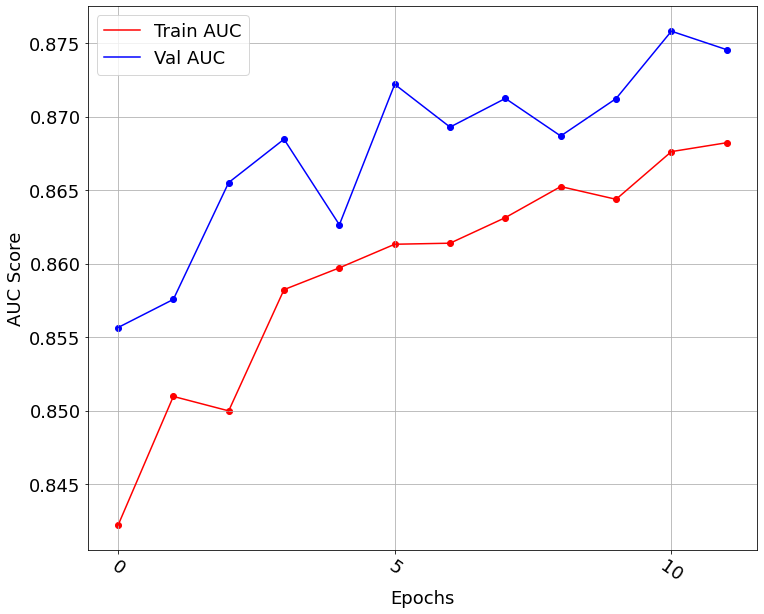

In [185]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,10))
plt.plot(np.arange(len(auc)),auc,color="red")
plt.plot(np.arange(len(auc)),val_auc,color='blue')
plt.scatter(np.arange(len(auc)),auc,color='red')
plt.scatter(np.arange(len(auc)),val_auc,color='blue')
plt.xticks(np.arange(0,len(auc)+1,5),rotation=-35)
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.legend(['Train AUC','Val AUC'])
plt.grid()
plt.show()

Learning Curves: 


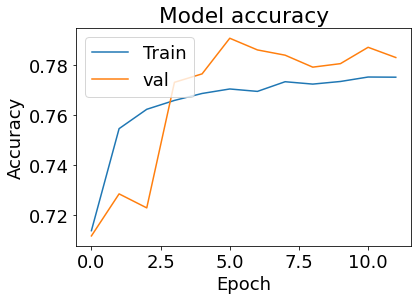

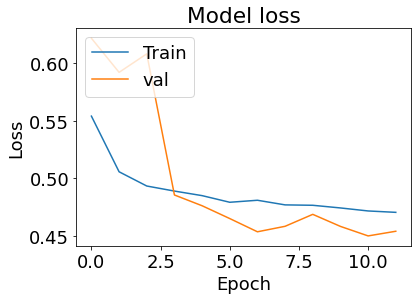

In [186]:
print('Learning Curves: ')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()
plt.close()

In [187]:
train_score = model1.evaluate(X_train_pooled_output, y_train, verbose=0)
val_score = model1.evaluate(X_val_pooled_output, y_val, verbose=0)
test_score = model1.evaluate(X_test_pooled_output, y_test, verbose=0)
# report results
print('\nTraining accuracy score was:', train_score[1])
print('\nVal accuracy score was:', val_score[1])
print('\nTesting accuracy score was:', test_score[1])


Training accuracy score was: 0.7849944233894348

Val accuracy score was: 0.7828618288040161

Testing accuracy score was: 0.7909955978393555


ROC AUC score =  0.8946143360705229


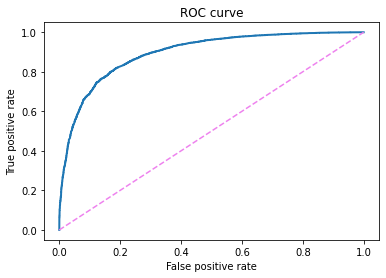

In [106]:
y_pred = model1.predict(X_test_pooled_output)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      3907
           1       0.90      0.77      0.83      6654

    accuracy                           0.80     10561
   macro avg       0.79      0.81      0.80     10561
weighted avg       0.82      0.80      0.81     10561

Various metrics of model:
Precision is: 77.18665464382326
Recall is: 90.04207573632539
F1 score is: 83.1202459944975
Accuracy is: 80.24808256793864 



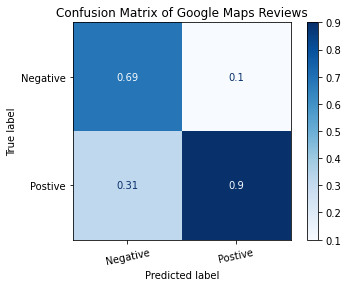

In [105]:
y_pred = model1.predict(X_test_pooled_output)
#Performance of the model on the test data
y_pred = np.where(y_pred<.43,0,1)
cal_metrics(y_pred,y_test)

Cross-Val

In [90]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(10, True, 1)
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((np.array(y_train), np.array(y_val)), axis=0)
acc = []
f1 = []
roc_s = []
res = dict()
fold = 1
thresh = []
X_input_tokens, X_input_mask, X_input_segment=bert_preprocess(inputs,tokenizer,55)
inputs_new=bert_model.predict([X_input_tokens, X_input_mask, X_input_segment])


X_data_tokens, X_data_mask, X_data_segment=bert_preprocess(data_ho.values,tokenizer,55)
data=bert_model.predict([X_data_tokens, X_data_mask, X_data_segment])
for train_index, test_index in kf.split(inputs_new):

  TrainX, Trainy = merge(inputs_new[train_index],targets[train_index],  data, np.array(label_ho))


  X_t_tokens, X_t_mask, X_t_segment=bert_preprocess(inputs[test_index],tokenizer,55)
  X_t_pooled_output=bert_model.predict([X_t_tokens, X_t_mask, X_t_segment])

  history = model1.fit(TrainX,Trainy,validation_data=(X_t_pooled_output,targets[test_index]),epochs=3)#,callbacks=[history_own])
  # Final evaluation of the model on test data
  scores = model1.evaluate(X_t_pooled_output, targets[test_index], verbose=0)
  model_val_probs = model1.predict(X_t_pooled_output)
  y_pred = np.where(model_val_probs<.50,0,1)
  F1_S = f1_score(targets[test_index], y_pred)
  roc = roc_auc_score(targets[test_index], y_pred)
  res[fold] = [scores[1]*100, F1_S, roc]
  acc.append(scores[1]*100)
  f1.append(F1_S)
  roc_s.append(roc)

  
  thresh_ps = np.linspace(.10,.50,1000)
  f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
  for p in thresh_ps:
      model_val_labels = model_val_probs >= p
      f1_scores.append(f1_score(targets[test_index], model_val_labels))    
      prec_scores.append(precision_score(targets[test_index], model_val_labels))
      rec_scores.append(recall_score(targets[test_index], model_val_labels))
      acc_scores.append(accuracy_score(targets[test_index], model_val_labels))
      
  # plt.plot(thresh_ps, f1_scores)
  # plt.plot(thresh_ps, prec_scores)
  # plt.plot(thresh_ps, rec_scores)
  # plt.plot(thresh_ps, acc_scores)

  # plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
  # plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
  # plt.xlabel('P threshold')
  # plt.ylabel('Metric score')

  best_f1_score = np.max(f1_scores) 
  best_thresh_p = thresh_ps[np.argmax(f1_scores)]

  print('Model best F1 score %.3f at prob decision threshold >= %.3f' 
        % (best_f1_score, best_thresh_p))
  thresh.append([best_f1_score, best_thresh_p])
  fold = fold + 1


Epoch 1/3
2374/2374 [==============================] - 6s 2ms/step - loss: 0.5443 - accuracy: 0.7233 - val_loss: 0.4513 - val_accuracy: 0.7989
Epoch 2/3
2374/2374 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.7594 - val_loss: 0.4769 - val_accuracy: 0.7866
Epoch 3/3
2374/2374 [==============================] - 5s 2ms/step - loss: 0.4928 - accuracy: 0.7630 - val_loss: 0.4786 - val_accuracy: 0.7868
Model best F1 score 0.807 at prob decision threshold >= 0.500
Epoch 1/3
2374/2374 [==============================] - 5s 2ms/step - loss: 0.4872 - accuracy: 0.7664 - val_loss: 0.4365 - val_accuracy: 0.8030
Epoch 2/3
2374/2374 [==============================] - 5s 2ms/step - loss: 0.4812 - accuracy: 0.7692 - val_loss: 0.4450 - val_accuracy: 0.7979
Epoch 3/3
2374/2374 [==============================] - 5s 2ms/step - loss: 0.4774 - accuracy: 0.7729 - val_loss: 0.4299 - val_accuracy: 0.8093
Model best F1 score 0.815 at prob decision threshold >= 0.447
Epoch 1/3
2374/237

What are best F1, acc, etc ?

In [91]:
f1

[0.8073770491803279,
 0.8082087661515074,
 0.8106734434561627,
 0.7950669115717659,
 0.8173005219985084,
 0.8052939679307712,
 0.8012374323279196,
 0.815496368038741,
 0.8119161827821257,
 0.826923076923077]

In [92]:
np.mean(f1)

0.8099493720360906

In [111]:
np.array(thresh)

array([[0.80737705, 0.5       ],
       [0.81539211, 0.44714715],
       [0.81403337, 0.44274274],
       [0.80693069, 0.37467467],
       [0.81880175, 0.45115115],
       [0.82079022, 0.35665666],
       [0.82490091, 0.35145145],
       [0.81848185, 0.44474474],
       [0.82083923, 0.39149149],
       [0.83141852, 0.45555556]])

In [110]:
np.mean(np.array(thresh)[:,1])

0.4215615615615616

Save model:

In [194]:
from tensorflow.keras.models import save_model, load_model
import pickle
save_model(model1,'/content/gdrive/MyDrive/Food/model_best_bert.model')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Food/model_best_bert.model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Food/model_best_bert.model/assets


# Testing reviews

In [ ]:
from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com.sa',
    ])

In [ ]:
text = "No parking"

text = pd.Series(text).apply(decontracted).apply(rem_num).apply(rem_stopwords).apply(rem_html)[0]
translator = Translator()
text = translator.translate(text, dest='en').text
X_text_tokens, X_text_mask, X_text_segment=bert_preprocess([text],tokenizer,55)
X_text_pooled_output=bert_model.predict([X_text_tokens, X_text_mask, X_text_segment])

y_pred = model1.predict(X_text_pooled_output)
result = ['ÿßŸäÿ¨ÿßÿ®Ÿä' if(y_pred  >= 0.50) else 'ÿ≥ŸÑÿ®Ÿä']
print('ÿßŸÑÿ™ŸÇŸäŸÖ:', result[0])

ÿßŸÑÿ™ŸÇŸäŸÖ: ÿ≥ŸÑÿ®Ÿä


In [ ]:
text = """
ÿßÿ®ÿØÿß ŸÖÿß ÿßŸÜÿµÿ≠ ŸÅŸäŸá ÿßŸÑÿ¥Ÿàÿ±ŸÖÿß ŸÑŸäÿ≥ÿ™ ŸÑÿ∞Ÿäÿ∞Ÿá
"""
text = translator.translate(text, dest='en').text
tex= BOW.transform([text])
y_pred = model.predict(tex)
result = ['ÿßŸäÿ¨ÿßÿ®Ÿä' if(y_pred  == 1) else 'ÿ≥ŸÑÿ®Ÿä']
print('ÿßŸÑÿ™ŸÇŸäŸÖ:', result[0])

ÿßŸÑÿ™ŸÇŸäŸÖ: ÿ≥ŸÑÿ®Ÿä


# Flask

In [76]:
!pip install flask-ngrok
!pip install deep-translator
from deep_translator import GoogleTranslator, PonsTranslator, LingueeTranslator

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97 kB 4.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97 kB 7.4 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.2 which is incompatible.


In [77]:
import sqlite3
conn = sqlite3.connect('/content/gdrive/MyDrive/Food/test.db', check_same_thread=False)
c = conn.cursor()

c.execute('''
          CREATE TABLE reviews
          ([review] TEXT, [score] TEXT)
          ''')
conn.commit()

In [96]:
import pickle
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

model1 = load_model('/content/gdrive/MyDrive/Food/model_best_bert.model', compile=False)
model1.compile(optimizer=opt,loss=tf.keras.losses.BinaryCrossentropy(),metrics='accuracy')

# with open('/content/gdrive/MyDrive/Food/tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [97]:
from flask import Flask,request,render_template
from flask_ngrok import run_with_ngrok
static_folder='/content/gdrive/MyDrive/Food/static/'
template_dir= '/content/gdrive/MyDrive/Food/templates/'
app = Flask(__name__,template_folder=template_dir,static_folder =static_folder )
run_with_ngrok(app)   
@app.route('/')

def home():
	return render_template('index.html')

@app.route('/',methods =['GET','POST'])
def predict():
	if request.method == 'POST':
		text = request.form['message']
		if (not text.isascii()):
				translator = Translator()
				text = GoogleTranslator(source='auto', target='en').translate(text=text)

		text1 = pd.Series(text).apply(decontracted).apply(rem_num).apply(rem_stopwords).apply(rem_html)[0]
		X_text_tokens, X_text_mask, X_text_segment=bert_preprocess([text1],tokenizer,55)
		X_text_pooled_output=bert_model.predict([X_text_tokens, X_text_mask, X_text_segment])
		# #convert test text to Bow vectors
		# X_text_bow = bow.transform([text1])
		# #don't forgot to normalize cv data
		# X_text_bow = normalize(X_text_bow,axis=0)
		# y_pred = model1.predict(X_text_pooled_output)
		# X_text_tok = tokenizer.texts_to_sequences([text1])
		# X_text_pad = sequence.pad_sequences(X_text_tok, maxlen=600)
		y_pred = model1.predict(X_text_pooled_output)
		y_pred = np.where(y_pred<.43,0,1)

		y_pred = ['postive' if(y_pred  == 1) else 'negative'][0]
		parms = (text,y_pred)
		c.execute("""
							INSERT INTO reviews (review, score)
										VALUES
										(?,?)
							""",parms)

		return render_template('result.html', prediction=y_pred)
@app.route('/admin')
def admin():  
	c.execute('''
						SELECT *
						FROM reviews
						''')

	conn.commit()
	rev_df = pd.DataFrame(c.fetchall(),columns=["Review","Rate"])
	postive = rev_df[rev_df.Rate == 'postive']
	negative = rev_df[rev_df.Rate == 'negative']
	if(len(negative)>0):
		plot_wordcloud(pd.DataFrame(negative.Review.apply(decontracted).apply(rem_num).apply(rem_stopwords).apply(rem_html).values), title="Word Cloud of Reviews", pn='n',max_words=5)
	if(len(postive)>0):
		plot_wordcloud(pd.DataFrame(postive.Review.apply(decontracted).apply(rem_num).apply(rem_stopwords).apply(rem_html).values), title="Word Cloud of Reviews", pn='p',max_words=5)

	return render_template('admin.html', tables=[rev_df.to_html(classes='data',index=False)], titles=['Reviews with prediction:'])

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f5bd-35-231-75-60.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [09/Oct/2021 15:41:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Oct/2021 15:41:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 15:41:44] "GET /static/styles.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Oct/2021 15:41:44] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 15:41:44] "GET /static/Picture1.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Oct/2021 15:41:44] "GET /static/Picture1.png HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 15:41:45] "GET /static/food-favicon.ico HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Oct/2021 15:41:45] "GET /static/food-favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 15:41:46] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Oct/2021 15:41:46] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 15:41:47] "GET /static/clap.gif HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Oct/2021 15:41:47] "GET /static/clap.gif HTTP/1.1" 200 -
127.0.0.1 - - [09/Oct/2021 15:41:48] "GET / HT